# **Capstone Module 2 - By Kelvin Setyadi**

## **Latar Belakang**

Dalam era digital yang semakin kompetitif, perusahaan perangkat lunak (Software as a Service / SaaS) menghadapi tantangan untuk tidak hanya meningkatkan volume penjualan, tetapi juga menjaga profitabilitas dari tiap produk yang ditawarkan. Salah satu produk unggulan dalam portofolio perusahaan adalah Marketing Suite, yang dirancang untuk membantu klien dalam mengelola kampanye pemasaran, analitik, serta pelacakan performa digital secara menyeluruh.

Meskipun Marketing Suite memiliki daya tarik pasar yang cukup tinggi dan jumlah pembeli yang banyak, terdapat indikasi bahwa profitabilitas produk ini belum optimal, bahkan dalam beberapa kasus mengalami kerugian. Hal ini menimbulkan pertanyaan strategis yang perlu dijawab, seperti:

- Apakah strategi diskon yang diterapkan terlalu agresif?
- Siapa saja pelanggan atau segmen yang sebenarnya mendatangkan kerugian?
- Apakah terdapat industri, wilayah, atau segmen pasar tertentu yang lebih menguntungkan dibanding yang lain?

Untuk menjawab pertanyaan-pertanyaan tersebut, dilakukanlah analisis data penjualan produk Marketing Suite berdasarkan berbagai dimensi penting seperti diskon, profit margin, wilayah geografis, segmen pelanggan, industri, serta perilaku pembelian pelanggan.

Hasil dari analisis ini diharapkan dapat memberikan gambaran menyeluruh terkait performa produk, sekaligus menjadi dasar dalam pengambilan keputusan yang lebih tepat terkait strategi pricing, target pasar, serta optimasi profit ke depan.

## **Pernyataan Masalah**

Meskipun produk Marketing Suite menunjukkan volume penjualan yang cukup tinggi dan menjangkau berbagai segmen, industri, dan wilayah geografis, namun profitabilitasnya masih menjadi isu utama. Berdasarkan hasil analisis data, muncul beberapa pertanyaan kritis yang perlu dijawab:

1. Mengapa profit dari produk Marketing Suite cenderung rendah, bahkan negatif di banyak kasus?
2. Bagaimana pengaruh variabel-variabel seperti diskon, jumlah penjualan, dan segmen pelanggan terhadap profitabilitas produk?
3. Segmen pelanggan dan industri mana yang memberikan kontribusi profit tertinggi dan terendah?
4. Apakah strategi pemberian diskon saat ini sudah efektif dalam meningkatkan profit, atau justru merugikan perusahaan?
5. Siapa saja pelanggan yang memiliki frekuensi pembelian tinggi namun menyumbang profit rendah, dan bagaimana seharusnya perusahaan merespons hal ini?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

In [3]:
df = pd.read_csv("SaaS-Sales.csv")
df.head()


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


Dataset ini berisi informasi mengenai pelanggan,wilayah geografis, produk, penjualan, dan keuntungan. Terdapat 19 kolom dalam dataset SaaS Sales yang berisikan: 

1.  Row ID : Nomor unik untuk setiap baris dalam file.
2.  Order ID : ID Unik untuk setiap pesanan yang dilakukan.
3.  Order Date : Tanggal pesanan dibuat.
4.  Date Key : Representasi numerik dari tanggal pesanan dalam format YYYYMMDD.
5.  Contact Name : Nama orang yang melakukan pemesanan atau kontak utama.
6.  Country : Negara tempat pelanggan berada.
7.  City : Kota tempat pelanggan berada. 
8.  Region : Wilayah geografis pelanggan (misalnya, EMEA untuk Eropa, Timur Tengah, da Afrika).   
9. Subregion : Sub wilayah geografis yang lebih spesifik dalam suatu region.
10. Customer : Nama perusahaan atua pelanggan yang membeli layanan SaaS.
11. Customer ID : ID unik pelanggan. 
12. Industry : Industri atau sektor bisnis tempat pelanggan beroperasi. 
13. Segment : Kategori pelanggan berdasarkan ukuran atau jenis bisnis (misalnya, SMB untuk usaha kecil-menengah, Strategic untuk pelanggan strategis).
14. Product : Nama produk SaaS yang dibeli oleh pelanggan. 
15.  License : Kode unik lisensi yang diberikan untuk penggunaan produk SaaS. 
16. Sales : Nilai penjualan dari pesanan yang dibuat. 
17. Quantity : Jumlah unit atau lisensi produk yang dibeli
18. Discount : Diskon yang diberikan pada pesanan, jika ada. 
19. Profit : Keuntungan yang diperoleh dari transaksi setelah dikurangi biaya. 




In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [5]:
df["Customer ID"] = df["Customer ID"].astype(str)

In [6]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   object        
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [8]:
# Profit Margin(%)
df["Profit Margin (%)"] = round((df["Profit"]/df["Sales"])*100, 2)

In [9]:
# Order Month * Order Year
df["Order Month"] = df["Order Date"].dt.month
df["Order Year"] = df["Order Date"].dt.year

In [10]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
2,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-07 00:00:00, 2022-08-30 00:00:00, 2022-12-02 00:00:00, 2021-11-13 00:00:00, 2023-11-24 00:00:00, 2021-10-15 00:00:00, 2023-12-26 00:00:00, 2022-11-04 00:00:00, 2020-08-25 00:00:00, 2021-03-02 00:00:00, 2021-04-05 00:00:00, 2020-12-26 00:00:00, 2020-09-20 00:00:00, 2023-11-06 00:00:00, 2022-11-07 00:00:00, 2023-02-03 00:00:00, 2022-10-14 00:00:00, 2022-09-06 00:00:00, 2023-09-19 00:00:00, 2023-12-23 00:00:00, 2021-09-07 00:00:00, 2020-10-22 00:00:00, 2022-03-14 00:00:00, 2021-05-31 00:00:00, 2021-05-28 00:00:00, 2020-03-01 00:00:00, 2022-11-21 00:00:00, 2022-05-12 00:00:00, 2021-12-28 00:00:00, 2022-11-17 00:00:00, 2022-11-08 00:00:00, 2020-09-08 00:00:00, 2020-08-05 00:00:00, 2020-09-14 00:00:00, 2023-04-22 00:00:00, 2

Insight dari nilai unik dari Dataset SaaS Sales:

- Dataset SaaS Sales memiliki 19 kolom dan 9994 baris
- Dataset ini tidak memiliki data kosong/NaN. 
- Kolom "Row ID" dan "Date Key" dapat dihapus karena tidak memiliki informasi tambahan untuk dapat dianalisis.
- Order ID memiliki 5009 unik ID dan memiliki pattern berdasarkan region dan tahun order dibuat. 
- Rentang waktu "Order Date" pada dataset ini dimulai dari 4 Januari 2020 hingga 31 Desember 2023
- Data menunjukan terdapat 48 "Country", 262 "City", 3 "Region", dan 12 "Subregion", dimana data ini menunjukkan distribusi geografis customer yang luas. 


In [11]:
df["Order Date"].agg(["min", "max"])

min   2020-01-04
max   2023-12-31
Name: Order Date, dtype: datetime64[ns]

In [12]:
df.drop(columns=["Row ID", "Date Key"], inplace=True)

### **Mengecek sebaran missing value pada data**

In [13]:
df.isna().sum()

Order ID             0
Order Date           0
Contact Name         0
Country              0
City                 0
Region               0
Subregion            0
Customer             0
Customer ID          0
Industry             0
Segment              0
Product              0
License              0
Sales                0
Quantity             0
Discount             0
Profit               0
Profit Margin (%)    0
Order Month          0
Order Year           0
dtype: int64

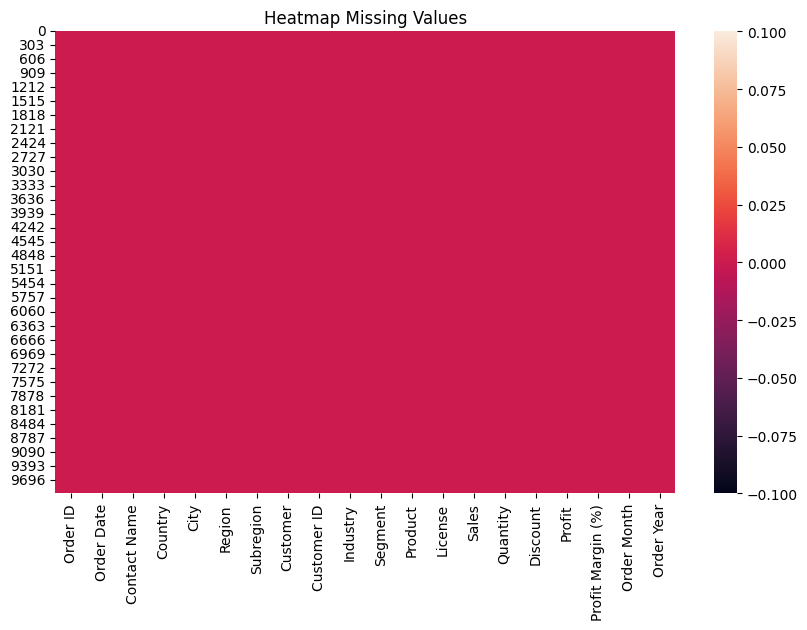

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna())

plt.title("Heatmap Missing Values")
plt.show()

Pada pengecekan missing value menunjukan hasil 0 yang menginformasikan tidak terdapat missing value dan pada heatmap setiap kolom tidak terdapat garis putih yang menandakan adanya missing value. Maka dari itu, pada dataset ini tidak perlu untuk menghandle missing value.

### **Identifikasi Duplikasi Data**

In [15]:
df.duplicated().sum()

np.int64(0)

Data set ini tidak terdapat data yang duplikat

In [16]:
df.duplicated(subset=['Order ID']).sum()

np.int64(4985)

In [17]:
df[df.duplicated(subset=['Order ID'], keep=False)]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Profit Margin (%),Order Month,Order Year
0,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,16.00,11,2022
1,EMEA-2022-152156,2022-11-09,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,30.00,11,2022
3,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,-40.00,10,2021
4,EMEA-2021-108966,2021-10-11,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,11.25,10,2021
5,AMER-2020-115812,2020-06-09,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694,29.00,6,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9987,EMEA-2023-163629,2023-11-18,Dylan Dickens,Finland,Espoo,EMEA,NOR,Siemens,1043,Manufacturing,Strategic,Data Smasher,GGI2WZG0KP,79.9900,1,0.00,28.7964,36.00,11,2023
9988,EMEA-2023-163629,2023-11-18,Dylan Dickens,Finland,Espoo,EMEA,NOR,Siemens,1043,Manufacturing,Strategic,Site Analytics,TFALA50KPS,206.1000,5,0.00,55.6470,27.00,11,2023
9990,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,17.00,2,2023
9991,AMER-2023-121258,2023-02-27,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,7.50,2,2023


Berdasarkan kolom "Order ID" terdapat 4985 unik ID yang duplikat dan total "Order ID" yang duplikat adalah 7456 ID. ini menunjukkan bahw:

- Beberapa order memiliki lebihd ari satu baris dalam dataset.
- Kemungkinan besar, setiap Order ID bisa memiliki beberapa produk(multi-item order), jadi satu pesanan bisa muncul dalam beberapa baris.

### **Identifikasi Whitespace**

 Mencari dan menghapus whitespaces(spasi kosong) dalam data sangat penting untuk menjaga akurasi analsis. Whitespaces yang tidak terlihat di awal atau akhir teks dapat menyebabkan nilai yang sama dianggap berbeda, sehingga berpotensi menimbulkan duplikasi atau kesalahan saat filter, pengelompokan, atau penggabungan data. Whitespaces juga dapat mengganggu proses pencarian data dan memperlambat pemrosesan, terutama dalam analisis teks. Oleh karena itu, pembersihan whitespaces merupakan bagian penting dalam tahap preprocesssing data. 

In [18]:
# Definisikan fungsi untuk mendeteksi spasi berlebih
def check_excessive_whitespace(value):
    if isinstance(value, str):
        return bool(re.search(r'\s{2,}', value))  # Mendeteksi 2 spasi atau lebih
    return False

# Proses deteksi spasi berlebih dan tampilkan informasi
whitespace_info = []
for column in df.columns:
    has_excessive_whitespace = df[column].apply(check_excessive_whitespace).any()
    whitespace_info.append({'Column': column, 'Has Excessive Whitespace': has_excessive_whitespace})

whitespace_df = pd.DataFrame(whitespace_info)
whitespace_df

,Column,Has Excessive Whitespace
0,Order ID,False
1,Order Date,False
2,Contact Name,False
3,Country,False
4,City,False
5,Region,False
6,Subregion,False
7,Customer,False
8,Customer ID,False
9,Industry,False


Dari hasil tabel diatas, dapat dilihat bahwa dataset SaaS Sales tidak memiliki whitespaces. Maka dataset ini bisa untuk dilakukan analisis lebih lanjut. 

### **Identifikasi Outliers**

Outlier merupakan data yang menyimpang secara signifikan dari mayoritas data lainnya, dan analisis terhadap outlier dapat memberikan insight penting. Misalnya, outlier dapat menunjukkan adanya kesalahan input atau masalah kualitas data, seperti nilai diskon yang melebihi batas seharusnya. Selain itu, outlier juga bisa mengindikasikan perilaku pelanggan yang unik, seperti pembelian dalam jumlah besar oleh satu pelanggan. Dalam konteks bisnis, analisis outlier membantu mendeteksi potensi kecurangan, menyusun strategi harga yang lebih baik, serta mengidentifikasi pelanggan yang bernilai tinggi.

In [19]:
display(df.describe(), df.describe(include='object'))

,Order Date,Sales,Quantity,Discount,Profit,Profit Margin (%),Order Month,Order Year
count,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,2022-05-01 00:07:12.259355648,229.858001,3.789574,0.156203,28.656896,12.031390,7.814889,2021.722934
min,2020-01-04 00:00:00,0.444000,1.000000,0.000000,-6599.978000,-275.000000,1.000000,2020.000000
25%,2021-05-23 00:00:00,17.280000,2.000000,0.000000,1.728750,7.500000,5.000000,2021.000000
50%,2022-06-27 00:00:00,54.490000,3.000000,0.200000,8.666500,27.000000,9.000000,2022.000000
75%,2023-05-15 00:00:00,209.940000,5.000000,0.200000,29.364000,36.250000,11.000000,2023.000000
max,2023-12-31 00:00:00,22638.480000,14.000000,0.800000,8399.976000,50.000000,12.000000,2023.000000
std,NaN,623.245101,2.225110,0.206452,234.260108,46.675436,3.285561,1.124039


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,1080,Finance,SMB,ContactMatcher,3NTBV9B3PS
freq,14,37,2001,922,4219,2507,192,192,2127,5191,1842,1


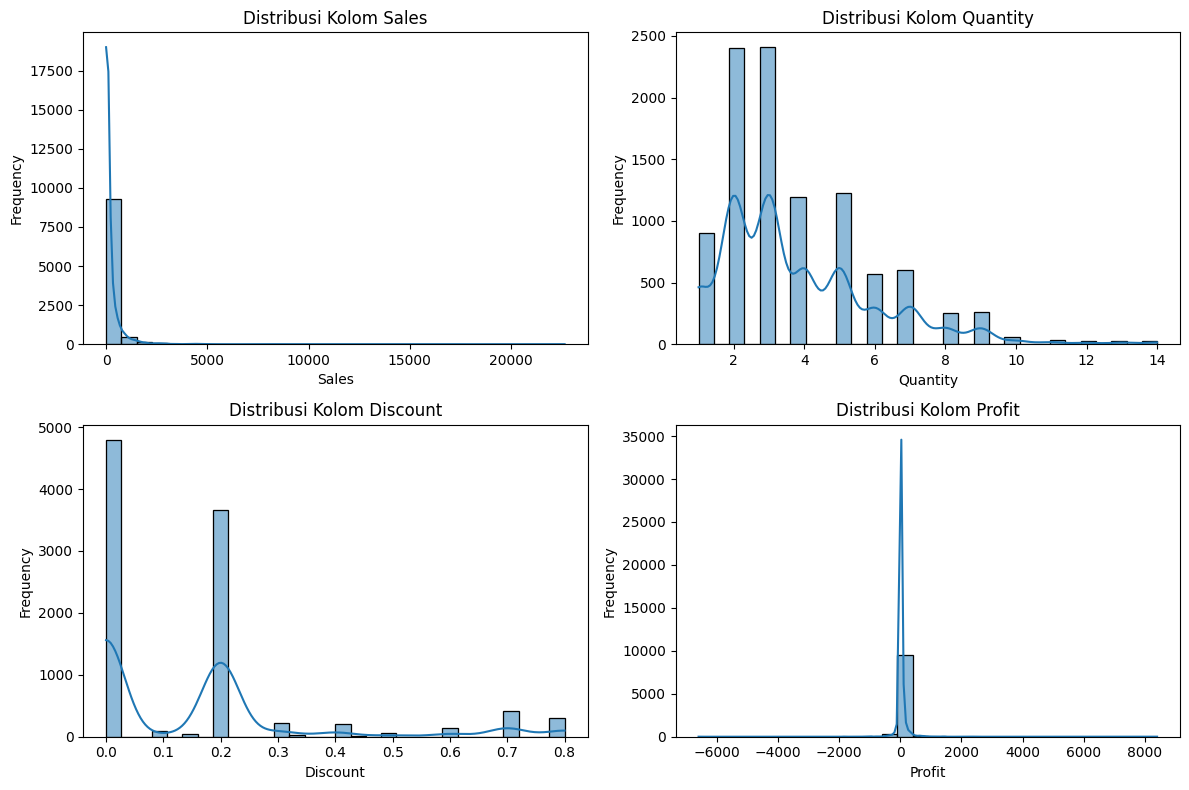

In [20]:
# Plot histograms for each column separately
columns_to_plot = ['Sales', 'Quantity', 'Discount', 'Profit']
plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_plot, start=1):
	plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
	sns.histplot(df[col], kde=True, bins=30)
	plt.title(f'Distribusi Kolom {col}')
	plt.xlabel(col)
	plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Distribusi kolom Sales tidak terdistribusi normal, melainkan positively skewed (right-skewed):**
- Penggunaan Metode statistik non-parametrik bisa lebih tepat

- Distribusi sangat condong ke kiri (right-skewed): Mayoritas nilai penjualan terkonsentrasi di angka kecil, sementara jumlah yang lebih besar jarang terjadi.

- Distribusi tidak simetris, dan sangat jauh dari bentuk bell curve (distribusi normal).

- Terlihat banyak nilai ekstrem (outliers) di sisi kanan grafik, menunjukkan bahwa beberapa transaksi memiliki nilai yang sangat tinggi dibanding mayoritas data lainnya.

**Distribusi kolom Quantity tidak terdistribusi normal, melainkan right-skewed:**

- Sebagian besar nilai Quantity terkonsenterasi di angka rendah (2-4), dengan sedikit nilai tinggi yang menjauh dari pusat distribusi

**Distribusi kolom Discount tidak terdistribusi normal:**

- Terdistribusi bimodal (dua puncah), dengan nilai terkonsenterasi pada 0.0 dan 0.2, lalu beberapa nilai tinggi sampai 0.8.

- Tidak bersifat kontinu dan tidak mengikuti pola lonceng (bell curve)

**Distribusi kolom Profit tidak terdistribusi normal, melainkan left-skewed:**

- Terlihat sedikit lebih simetris dibanding kolom lain, namun memiliki ekor panjang ke kiri (negatif) dan puncak yang sangat tajam di sekitar 0. 



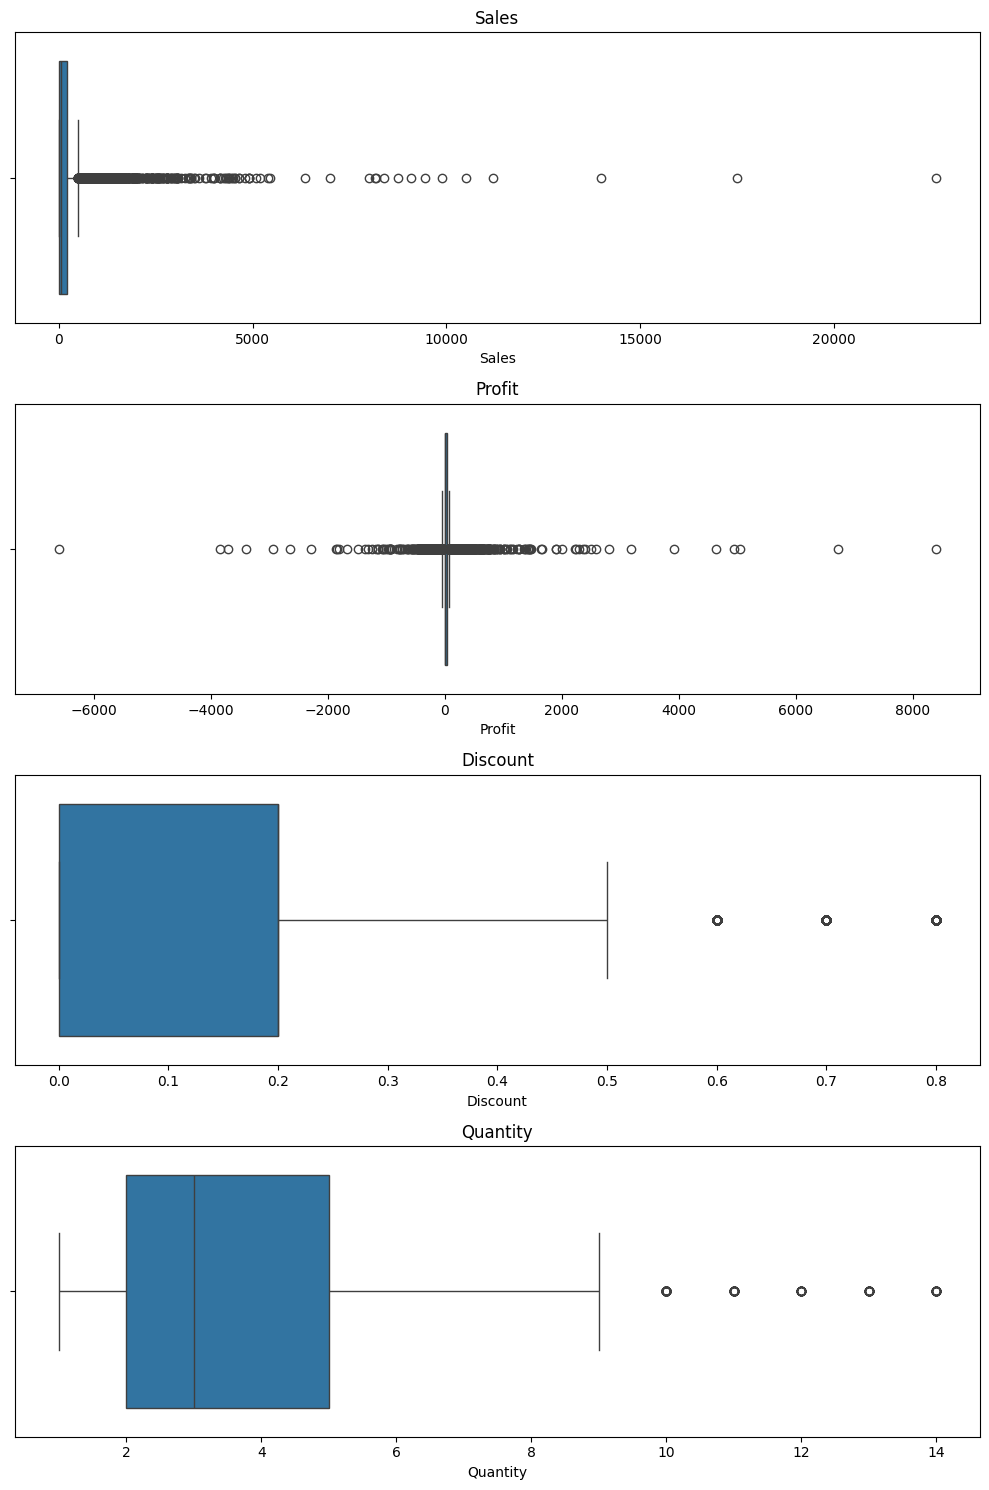

In [21]:
feature = ['Sales', 'Profit', 'Discount', 'Quantity']
plt.figure(figsize=(10, 15))

for idx, col in enumerate(feature, start=1):
    plt.subplot(4, 1, idx)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [22]:
# Target columns to analyze
target_cols = ['Sales', 'Quantity', 'Discount', 'Profit']

# List to store result rows
result_list = []

# IQR-based outlier detection
for col in target_cols:
    if col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Count outliers
        outlier_count = df[(df[col] < lower) | (df[col] > upper)].shape[0]

        result_list.append({
            "Column": col,
            "Outlier Count": outlier_count,
            "Lower Bound": round(lower, 2),
            "Upper Bound": round(upper, 2)
        })

# Create DataFrame from the result list
outlier_summary = pd.DataFrame(result_list)
outlier_summary

,Column,Outlier Count,Lower Bound,Upper Bound
0,Sales,1167,-271.71,498.93
1,Quantity,170,-2.50,9.50
2,Discount,856,-0.30,0.50
3,Profit,1881,-39.72,70.82


### **Kesimpulan outliers**

**1. Sales**

Terdapat 1167 data outlier pada kolom "Sales". Ini menunjukkan adanya transaksi dengan nilai penjualan yang sangat tinggai atau rendah dibanding rata-rata data lainnya. Outler ini dapat berasal dari pembelian dalam jumlah besar, diskon besar-besaran, atau kesalahan pencatatan harga. 

**2. Quantity**

Sebanyak 170 data outlier ditemukan pada komlom "Quantity". Nilai Quantity yang tidak wajar (sangat rendah atau sangat tinggi) mengindikasikan pembelian tidak normal, order test, atau bahkan kesalahan input. 

**3. Discount**

Kolom "Discount" memiliki 856 data outlier, menandakan nilai diskon yang berada di luar rentang umum. Diskon yang terlalu tinggi atau rendah bisa jadi bagian dari strategi promosi, namuun juga berpotensi menunjukkan kesalahan sistem atau pemberian dikson yang tidak sesuai kebijakan perusahaan. 

**4. Profit**

Outlier pada kolom "Profit" berjumlah 1881, paling banyak di antara semua kolom yang dianalisis. Nilai ini mencerminkan transaksi dengan margin keuntungan yang sangat tinggi atau kerugian besar. Hal ini pentging untuk ditelusuri lebih dalam karena bisa berdampak langsung pada profitabilitas bisnis dan efisiensi strategi penjualan. 



### **Analisis Lanjutan Outliers**

In [23]:
# Define a function to perform advanced outlier analysis for a given column
def advanced_outlier_analysis(column_name):
    # Calculate total for the column
    total_value = df[column_name].sum()

    # Define outliers based on IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_data = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Calculate outlier contribution
    outlier_contribution = (outlier_data[column_name].sum() / total_value) * 100

    # Group by product and calculate outlier counts and total outlier values
    outlier_counts = outlier_data.groupby('Product').size().reset_index(name='Outlier Count')
    outlier_distribution = outlier_data.groupby('Product')[column_name].sum().reset_index(name=f'Total Outlier {column_name}')
    outlier_summary = pd.merge(outlier_distribution, outlier_counts, on='Product').sort_values(by=f'Total Outlier {column_name}', ascending=False).reset_index(drop=True)

    return outlier_contribution, outlier_summary

In [24]:
# Perform analysis for Sales
sales_outlier_contribution, sales_outlier_summary = advanced_outlier_analysis('Sales')
print(f"Kontribusi outlier terhadap total Sales: {sales_outlier_contribution:.2f}%")
display(sales_outlier_summary)

Kontribusi outlier terhadap total Sales: 64.32%


,Product,Total Outlier Sales,Outlier Count
0,ContactMatcher,304529.0025,226
1,FinanceHub,236939.3000,229
2,Site Analytics,212421.5160,210
3,Big Ol Database,176773.3140,65
4,Alchemy,144188.2160,56
5,Marketing Suite - Gold,129137.6520,142
6,Data Smasher,74355.6340,69
7,Marketing Suite,74326.9644,63
8,OneView,60802.4580,56
9,Support,40148.0560,18


### Kesimpulan: Distribusi Outlier Sales Berdasarkan Produk

Berdasarkan analisis outlier sales per produk, ditemukan beberapa temuan penting sebagai berikut:

1. Produk dengan Total Outlier Sales Tertinggi
- **ContactMatcher** mencatat total outlier sales tertinggi sebesar **304,529.00** dengan **226** kasus outlier. Ini menunjukkan adanya volume transaksi besar yang menyimpang dari tren umum.
- **FinanceHub** dan **Site Analytics** juga mencatat angka sales yang besar dari outlier, dengan jumlah kasus **229** dan **210**, mengindikasikan potensi nilai transaksi tinggi yang perlu ditelusuri lebih lanjut.

2. Produk dengan Jumlah Outlier Tertinggi
- **FinanceHub** dan **ContactMatcher** termasuk produk dengan jumlah outlier terbanyak, menunjukkan konsistensi dalam penyimpangan jumlah transaksi yang perlu diteliti apakah disebabkan oleh strategi pemasaran, segmentasi pasar, atau faktor lain.

3. Produk dengan Total Outlier Sales Terendah
- **SaaS Connector Pack - Gold** dan **ChatBot Plugin** mencatat total outlier sales yang sangat rendah (**604.66** dan **1,113.02**), yang mungkin mengindikasikan kurangnya volume transaksi yang signifikan atau penggunaan produk yang terbatas.

Rekomendasi:
- Fokuskan analisis lanjutan pada produk **ContactMatcher**, **FinanceHub**, dan **Site Analytics** karena menunjukkan total penjualan outlier yang tinggi.
- Lakukan investigasi lebih lanjut terhadap produk dengan jumlah outlier yang banyak untuk mengetahui apakah pola ini mengindikasikan potensi pasar atau isu operasional.
- Tinjau kembali strategi pemasaran atau distribusi untuk produk dengan volume outlier rendah untuk mengetahui apakah ada peluang yang belum tergarap.


In [25]:
# Perform analysis for Quantity
quantity_outlier_contribution, quantity_outlier_summary = advanced_outlier_analysis('Quantity')
print(f"Kontribusi outlier terhadap total Quantity: {quantity_outlier_contribution:.2f}%")
display(quantity_outlier_summary)

Kontribusi outlier terhadap total Quantity: 5.22%


,Product,Total Outlier Quantity,Outlier Count
0,ContactMatcher,468,40
1,Support,255,22
2,FinanceHub,223,19
3,Data Smasher,207,18
4,SaaS Connector Pack,177,15
5,Site Analytics,166,14
6,Marketing Suite - Gold,159,14
7,ChatBot Plugin,87,8
8,Storage,75,6
9,OneView,73,6


### Kesimpulan: Distribusi Outlier Quantity Berdasarkan Produk

Berdasarkan analisis outlier quantity per produk, ditemukan beberapa temuan penting sebagai berikut:

1. Produk dengan Total Outlier Quantity Tertinggi
- **ContactMatcher** menempati posisi teratas dengan total outlier quantity sebesar **468** dari **40** kasus. Hal ini mengindikasikan bahwa ada banyak pesanan dalam jumlah besar yang menyimpang dari pola umum.
- **Support** dan **FinanceHub** juga memiliki total outlier quantity yang tinggi (**255** dan **223**), yang menunjukkan volume pemesanan luar biasa pada sejumlah transaksi.

2. Produk dengan Jumlah Outlier Tinggi
- **ContactMatcher** tidak hanya memiliki total quantity tertinggi, tetapi juga jumlah outlier terbanyak (**40 kasus**), menandakan bahwa produk ini sering dipesan dalam jumlah besar di luar tren normal.

3. Produk dengan Outlier Quantity Rendah
- Produk seperti **Big Ol Database** dan **Marketing Suite** memiliki jumlah dan total quantity outlier yang rendah, masing-masing hanya mencatat **3** dan **5** outlier. Ini menunjukkan bahwa produk-produk ini cenderung memiliki stabilitas dalam jumlah pesanan.

Rekomendasi:
- Perlu dilakukan analisis mendalam terhadap produk **ContactMatcher**, **Support**, dan **FinanceHub** untuk memahami alasan di balik tingginya jumlah pesanan yang menyimpang.
- Pertimbangkan potensi kelebihan permintaan atau promosi besar-besaran pada produk dengan quantity outlier tinggi.
- Evaluasi kembali strategi pemesanan atau segmentasi pasar untuk produk dengan quantity outlier rendah, guna mencari peluang peningkatan.


In [26]:
# Perform analysis for Discount
discount_outlier_contribution, discount_outlier_summary = advanced_outlier_analysis('Discount')
print(f"Kontribusi outlier terhadap total Discount: {discount_outlier_contribution:.2f}%")
display(discount_outlier_summary)

Kontribusi outlier terhadap total Discount: 39.42%


,Product,Total Outlier Discount,Outlier Count
0,ContactMatcher,452.4,613
1,SaaS Connector Pack,82.8,138
2,OneView,53.6,67
3,Big Ol Database,16.1,23
4,Marketing Suite,10.5,15


### Kesimpulan: Distribusi Outlier Discount Berdasarkan Produk

Berdasarkan analisis outlier discount per produk, ditemukan beberapa temuan penting sebagai berikut:

1. Produk dengan Total Outlier Discount Tertinggi
- **ContactMatcher** menonjol dengan total outlier discount sebesar **452.4** dari **613 kasus**. Ini menunjukkan bahwa produk ini sering mendapatkan diskon besar yang menyimpang dari pola umum, dan perlu ditinjau ulang strategi diskonnya.
- **SaaS Connector Pack** berada di posisi kedua dengan total discount outlier sebesar **82.8**, menunjukkan bahwa produk ini juga sering diberikan potongan harga signifikan.

2. Produk dengan Jumlah Outlier Tertinggi
- **ContactMatcher** memiliki jumlah outlier terbanyak secara signifikan (**613 kasus**), jauh di atas produk lainnya. Hal ini menunjukkan adanya anomali dalam kebijakan diskon terhadap produk ini.
- Produk lain seperti **SaaS Connector Pack** dan **OneView** juga memiliki jumlah outlier yang cukup tinggi (**138** dan **67 kasus**), dan patut dianalisis lebih lanjut.

3. Produk dengan Discount Outlier Rendah
- Produk seperti **Marketing Suite** dan **Big Ol Database** mencatat jumlah dan total outlier discount yang relatif rendah, menunjukkan kestabilan dalam pemberian diskon.

Rekomendasi:
- Lakukan audit menyeluruh terhadap kebijakan diskon pada **ContactMatcher**, karena tingginya frekuensi dan besarnya diskon dapat berdampak langsung pada margin keuntungan.
- Tinjau ulang strategi promosi pada produk dengan banyak outlier untuk memastikan diskon yang diberikan tetap menguntungkan.
- Pertahankan kontrol diskon yang ketat pada produk dengan tingkat outlier rendah guna menjaga stabilitas pricing.


In [27]:
# Perform analysis for Profit
profit_outlier_contribution, profit_outlier_summary = advanced_outlier_analysis('Profit')
print(f"Kontribusi profit terhadap total Profit: {profit_outlier_contribution:.2f}%")
display(profit_outlier_summary)

Kontribusi profit terhadap total Profit: 67.13%


,Product,Total Outlier Profit,Outlier Count
0,Alchemy,55297.8354,63
1,Site Analytics,32633.7013,264
2,Data Smasher,30578.5788,160
3,FinanceHub,25207.4225,236
4,Marketing Suite - Gold,14403.8149,156
5,Support,12060.8657,135
6,OneView,12055.8958,137
7,ContactMatcher,4905.6913,417
8,SaaS Connector Pack,3161.2441,100
9,SaaS Connector Pack - Gold,3147.2928,28


### Kesimpulan: Distribusi Outlier Profit Berdasarkan Produk

Berdasarkan analisis outlier profit per produk, ditemukan beberapa temuan penting sebagai berikut:

1. Produk dengan Total Outlier Profit Tertinggi
- **Alchemy** mencatat total outlier profit tertinggi sebesar **55297.83** meskipun hanya dengan 63 kasus outlier. Ini menunjukkan bahwa setiap outlier pada produk ini memiliki dampak profit yang sangat besar.
- **Site Analytics** dan **Data Smasher** juga mencatat outlier profit yang besar, dengan jumlah kasus masing-masing **264** dan **160**, mengindikasikan potensi keuntungan yang signifikan dari produk-produk ini.

2. Produk dengan Jumlah Outlier Tertinggi
- **ContactMatcher** memiliki jumlah outlier terbanyak (**417**), namun total outlier profit-nya relatif lebih rendah (**4905.69**). Ini menunjukkan bahwa banyak transaksi yang menyimpang, namun dengan margin profit yang kecil per outlier.

3. Produk dengan Outlier Profit Negatif
- **Marketing Suite** adalah satu-satunya produk dalam daftar yang menunjukkan total outlier profit **negatif (-4716.58)**. Hal ini mengindikasikan bahwa sebagian besar outlier dari produk ini mengalami **kerugian**, sehingga memerlukan perhatian khusus.

Rekomendasi:
- Fokuskan analisis lebih dalam pada produk **Alchemy**, **Site Analytics**, dan **Data Smasher** untuk memahami faktor-faktor yang berkontribusi pada profit tinggi dari outlier.
- Evaluasi kembali strategi terkait produk **Marketing Suite**, karena banyak transaksi outlier-nya cenderung merugikan.
- Produk seperti **ContactMatcher** dengan banyak outlier perlu dicek dari segi efisiensi operasional atau potensi fraud/error transaksi kecil yang berulang.



### **Distribusi Outlier Berdasarkan Region**

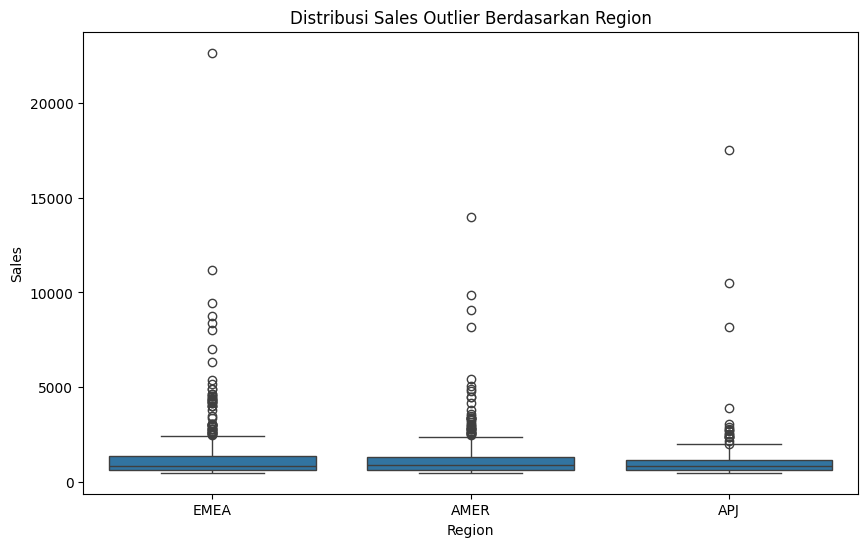

Kontribusi sales outlier berdasarkan region dalam bentuk tabel:


,Region,Total Outlier Sales
0,AMER,519981.5960
1,APJ,249240.1924
2,EMEA,708261.0165


Top 10 pelanggan dengan kontribusi sales outlier tertinggi dalam bentuk tabel:


,Customer,Total Outlier Sales
0,Anthem,44983.9660
1,Ford Motor,31504.9800
2,Valero Energy,30871.7028
3,Allstate,30572.4260
4,Lowes,30558.8290
5,Bank of America Corp.,28436.9436
6,BMW,28245.0800
7,AmerisourceBergen,27944.6640
8,Volkswagen,27320.3320
9,Tyson Foods,26923.2470


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2152\2005774063.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_outlier_sales_customers.values, y=top_outlier_sales_customers.index, palette="magma")


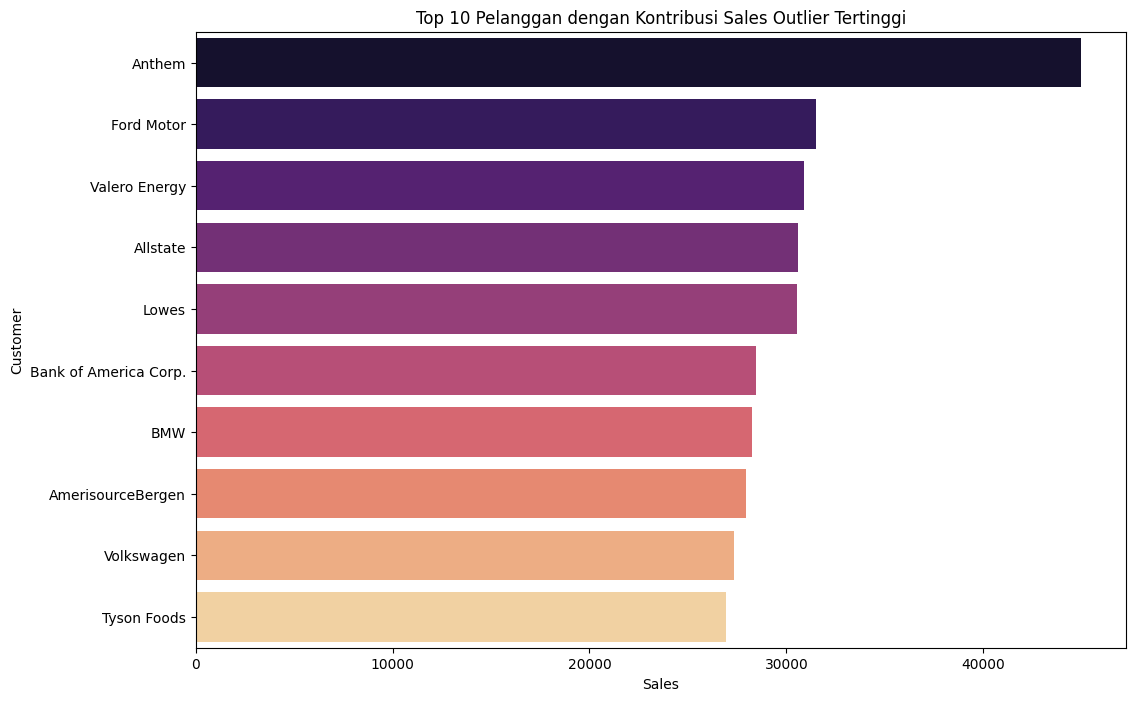

In [28]:
# Define outliers for the Sales column using the IQR method
Q1_sales = df['Sales'].quantile(0.25)
Q3_sales = df['Sales'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales
lower_bound_sales = Q1_sales - 1.5 * IQR_sales
upper_bound_sales = Q3_sales + 1.5 * IQR_sales

# Filter the DataFrame to include only outliers for Sales
outlier_sales = df[(df['Sales'] < lower_bound_sales) | (df['Sales'] > upper_bound_sales)]

# Visualisasi distribusi outlier berdasarkan region untuk Sales
plt.figure(figsize=(10, 6))
sns.boxplot(data=outlier_sales, x='Region', y='Sales')
plt.title('Distribusi Sales Outlier Berdasarkan Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

# Analisis kontribusi sales outlier per wilayah dalam bentuk tabel
outlier_region_sales_contribution = outlier_sales.groupby('Region')['Sales'].sum().reset_index()
outlier_region_sales_contribution.columns = ['Region', 'Total Outlier Sales']
print("Kontribusi sales outlier berdasarkan region dalam bentuk tabel:")
display(outlier_region_sales_contribution)

# Analisis pelanggan dengan kontribusi sales outlier tertinggi
top_outlier_sales_customers = outlier_sales.groupby('Customer')['Sales'].sum().sort_values(ascending=False).head(10)

# Konversi ke DataFrame untuk ditampilkan sebagai tabel
top_outlier_sales_customers_df = top_outlier_sales_customers.reset_index()
top_outlier_sales_customers_df.columns = ['Customer', 'Total Outlier Sales']

print("Top 10 pelanggan dengan kontribusi sales outlier tertinggi dalam bentuk tabel:")
display(top_outlier_sales_customers_df)

# Visualisasi distribusi sales outlier berdasarkan pelanggan
plt.figure(figsize=(12, 8))
sns.barplot(x=top_outlier_sales_customers.values, y=top_outlier_sales_customers.index, palette="magma")
plt.title('Top 10 Pelanggan dengan Kontribusi Sales Outlier Tertinggi')
plt.xlabel('Sales')
plt.ylabel('Customer')
plt.show()


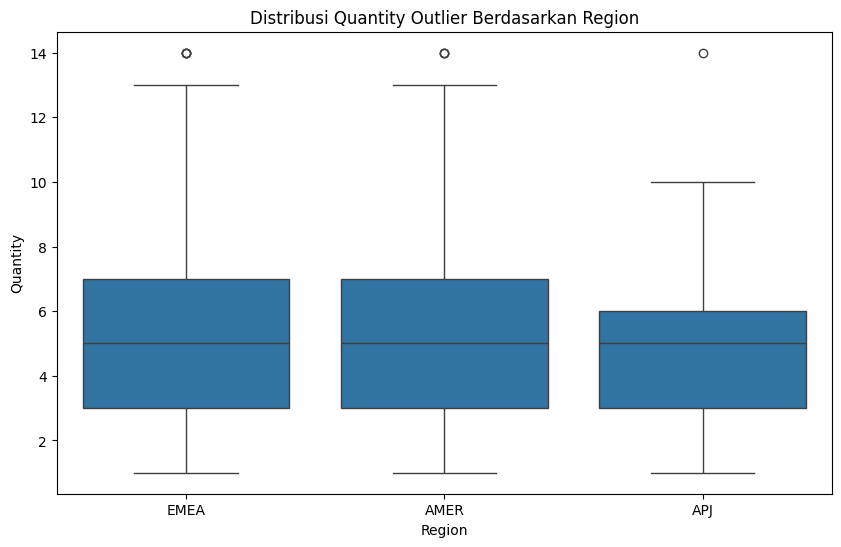

Kontribusi quantity outlier berdasarkan region dalam bentuk tabel:


,Region,Total Outlier Quantity
0,AMER,2174
1,APJ,1078
2,EMEA,2768


Top 10 pelanggan dengan kontribusi quantity outlier tertinggi dalam bentuk tabel:


,Customer,Total Outlier Quantity
0,Tyson Foods,156
1,Ford Motor,123
2,Bank of America Corp.,123
3,AmerisourceBergen,117
4,BNP Paribas,116
5,Volkswagen,115
6,Valero Energy,114
7,American Express,107
8,UnitedHealth Group,107
9,Morgan Stanley,97


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2152\588355447.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_outlier_quantity_customers.values, y=top_outlier_quantity_customers.index, palette="plasma")


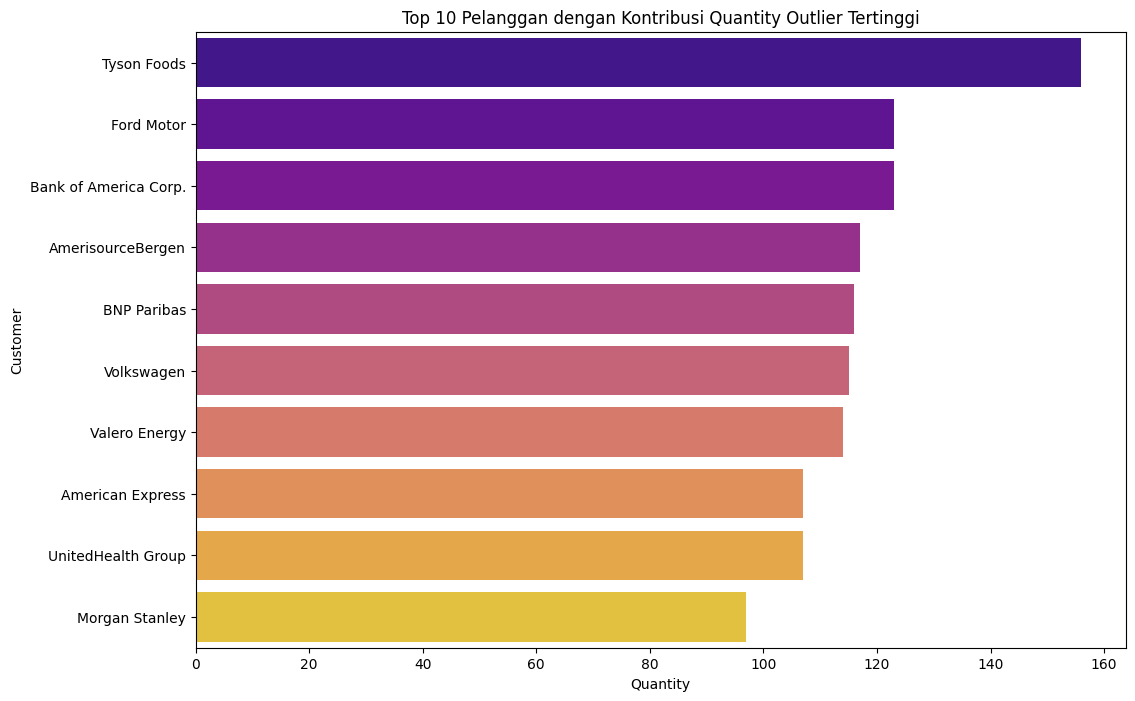

In [29]:
# Visualisasi distribusi outlier berdasarkan region untuk Quantity
plt.figure(figsize=(10, 6))
sns.boxplot(data=outlier_sales, x='Region', y='Quantity')
plt.title('Distribusi Quantity Outlier Berdasarkan Region')
plt.xlabel('Region')
plt.ylabel('Quantity')
plt.show()

# Analisis kontribusi quantity outlier per wilayah dalam bentuk tabel
outlier_region_quantity_contribution = outlier_sales.groupby('Region')['Quantity'].sum().reset_index()
outlier_region_quantity_contribution.columns = ['Region', 'Total Outlier Quantity']
print("Kontribusi quantity outlier berdasarkan region dalam bentuk tabel:")
display(outlier_region_quantity_contribution)

# Analisis pelanggan dengan kontribusi quantity outlier tertinggi
top_outlier_quantity_customers = outlier_sales.groupby('Customer')['Quantity'].sum().sort_values(ascending=False).head(10)

# Konversi ke DataFrame untuk ditampilkan sebagai tabel
top_outlier_quantity_customers_df = top_outlier_quantity_customers.reset_index()
top_outlier_quantity_customers_df.columns = ['Customer', 'Total Outlier Quantity']

print("Top 10 pelanggan dengan kontribusi quantity outlier tertinggi dalam bentuk tabel:")
display(top_outlier_quantity_customers_df)

# Visualisasi distribusi quantity outlier berdasarkan pelanggan
plt.figure(figsize=(12, 8))
sns.barplot(x=top_outlier_quantity_customers.values, y=top_outlier_quantity_customers.index, palette="plasma")
plt.title('Top 10 Pelanggan dengan Kontribusi Quantity Outlier Tertinggi')
plt.xlabel('Quantity')
plt.ylabel('Customer')
plt.show()


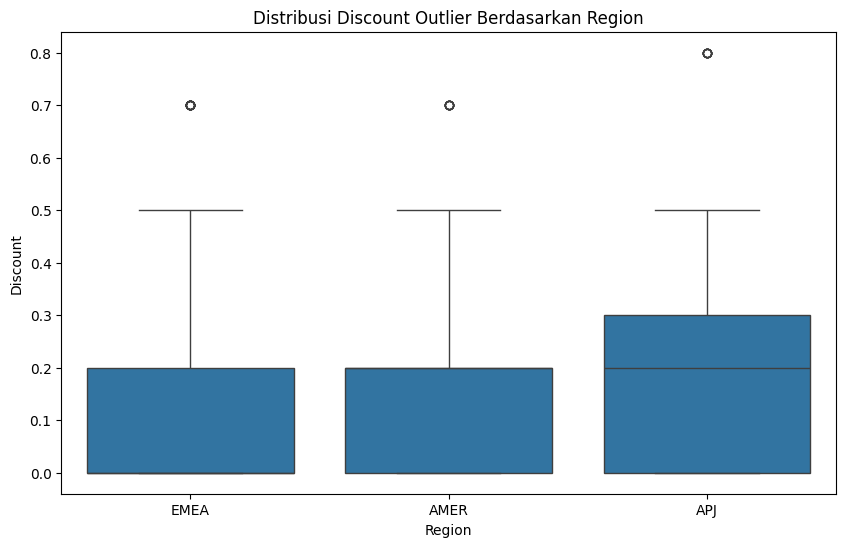

Kontribusi discount outlier berdasarkan region dalam bentuk tabel:


,Region,Total Outlier Discount
0,AMER,58.75
1,APJ,42.70
2,EMEA,68.45


Top 10 pelanggan dengan kontribusi discount outlier tertinggi dalam bentuk tabel:


,Customer,Total Outlier Discount
0,Tyson Foods,4.55
1,BNP Paribas,4.54
2,AmerisourceBergen,3.90
3,Ford Motor,3.90
4,Allstate,3.80
5,Morgan Stanley,3.30
6,Itochu,3.00
7,HSBC Holdings,3.00
8,Pfizer,2.82
9,Chevron,2.80


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2152\2371980534.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_outlier_discount_customers.values, y=top_outlier_discount_customers.index, palette="mako")


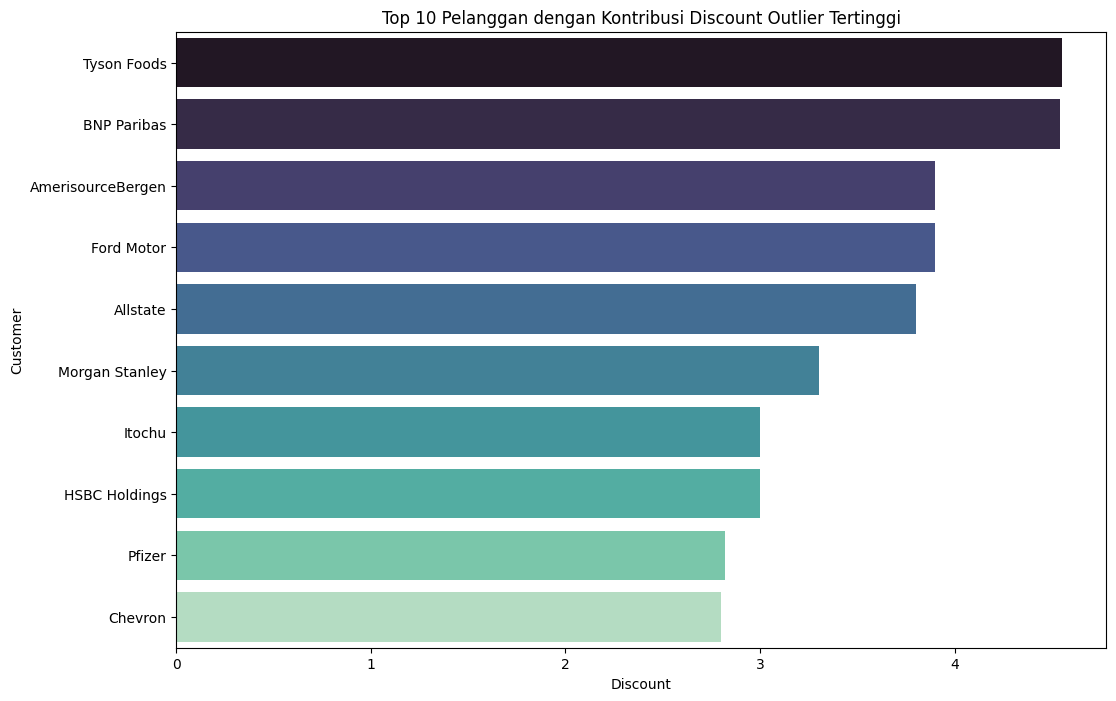

In [30]:
# Visualisasi distribusi outlier berdasarkan region untuk Discount
plt.figure(figsize=(10, 6))
sns.boxplot(data=outlier_sales, x='Region', y='Discount')
plt.title('Distribusi Discount Outlier Berdasarkan Region')
plt.xlabel('Region')
plt.ylabel('Discount')
plt.show()

# Analisis kontribusi discount outlier per wilayah dalam bentuk tabel
outlier_region_discount_contribution = outlier_sales.groupby('Region')['Discount'].sum().reset_index()
outlier_region_discount_contribution.columns = ['Region', 'Total Outlier Discount']
print("Kontribusi discount outlier berdasarkan region dalam bentuk tabel:")
display(outlier_region_discount_contribution)

# Analisis pelanggan dengan kontribusi discount outlier tertinggi
top_outlier_discount_customers = outlier_sales.groupby('Customer')['Discount'].sum().sort_values(ascending=False).head(10)

# Konversi ke DataFrame untuk ditampilkan sebagai tabel
top_outlier_discount_customers_df = top_outlier_discount_customers.reset_index()
top_outlier_discount_customers_df.columns = ['Customer', 'Total Outlier Discount']

print("Top 10 pelanggan dengan kontribusi discount outlier tertinggi dalam bentuk tabel:")
display(top_outlier_discount_customers_df)

# Visualisasi distribusi discount outlier berdasarkan pelanggan
plt.figure(figsize=(12, 8))
sns.barplot(x=top_outlier_discount_customers.values, y=top_outlier_discount_customers.index, palette="mako")
plt.title('Top 10 Pelanggan dengan Kontribusi Discount Outlier Tertinggi')
plt.xlabel('Discount')
plt.ylabel('Customer')
plt.show()


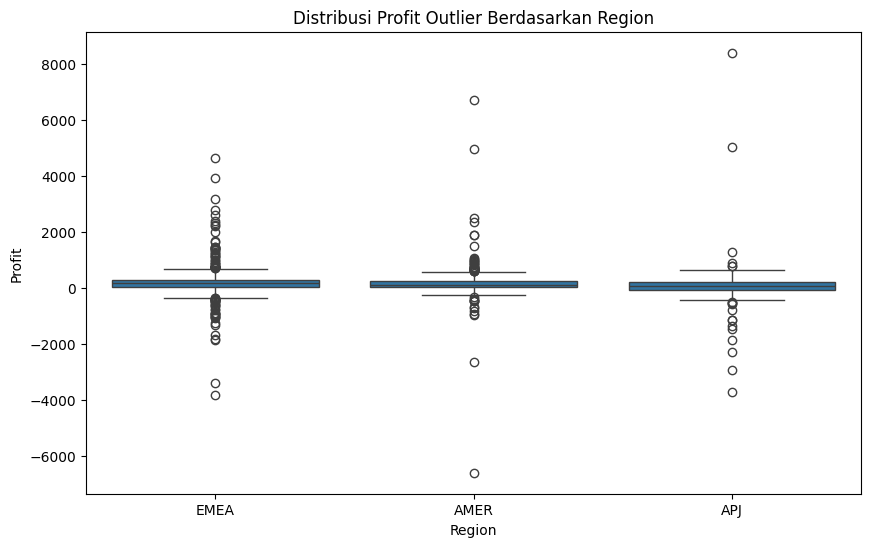

Kontribusi profit outlier berdasarkan region dalam bentuk tabel:


,Region,Total Outlier Profit
0,AMER,74229.2101
1,APJ,13499.9559
2,EMEA,99817.4291


Top 10 pelanggan dengan kontribusi profit outlier tertinggi dalam bentuk tabel:


,Customer,Total Outlier Profit
0,Valero Energy,9385.7484
1,Coca-Cola,9035.8321
2,Lowes,7615.8012
3,Mondelez International,7417.4322
4,Trafigura Group,6530.6432
5,Lukoil,5936.0246
6,Bank of America Corp.,4964.8479
7,Phillips 66,4915.4007
8,BMW,4710.6189
9,Walt Disney,4695.8802


C:\Users\ASUS\AppData\Local\Temp\ipykernel_2152\3777042019.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_outlier_profit_customers.values, y=top_outlier_profit_customers.index, palette="rocket")


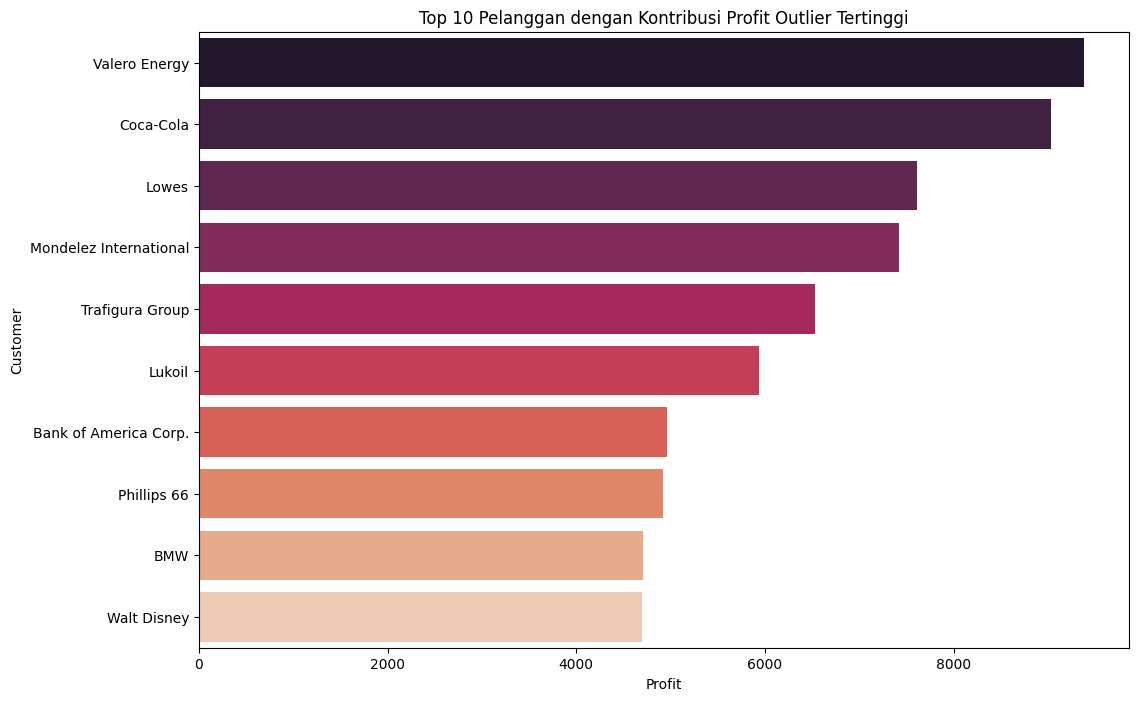

In [31]:
# Visualisasi distribusi outlier berdasarkan region untuk Profit
plt.figure(figsize=(10, 6))
sns.boxplot(data=outlier_sales, x='Region', y='Profit')
plt.title('Distribusi Profit Outlier Berdasarkan Region')
plt.xlabel('Region')
plt.ylabel('Profit')
plt.show()

# Analisis kontribusi profit outlier per wilayah dalam bentuk tabel
outlier_region_profit_contribution = outlier_sales.groupby('Region')['Profit'].sum().reset_index()
outlier_region_profit_contribution.columns = ['Region', 'Total Outlier Profit']
print("Kontribusi profit outlier berdasarkan region dalam bentuk tabel:")
display(outlier_region_profit_contribution)

# Analisis pelanggan dengan kontribusi profit outlier tertinggi
top_outlier_profit_customers = outlier_sales.groupby('Customer')['Profit'].sum().sort_values(ascending=False).head(10)

# Konversi ke DataFrame untuk ditampilkan sebagai tabel
top_outlier_profit_customers_df = top_outlier_profit_customers.reset_index()
top_outlier_profit_customers_df.columns = ['Customer', 'Total Outlier Profit']

print("Top 10 pelanggan dengan kontribusi profit outlier tertinggi dalam bentuk tabel:")
display(top_outlier_profit_customers_df)

# Visualisasi distribusi profit outlier berdasarkan pelanggan
plt.figure(figsize=(12, 8))
sns.barplot(x=top_outlier_profit_customers.values, y=top_outlier_profit_customers.index, palette="rocket")
plt.title('Top 10 Pelanggan dengan Kontribusi Profit Outlier Tertinggi')
plt.xlabel('Profit')
plt.ylabel('Customer')
plt.show()


Outlier dalam dataset SaaS-Sales ini tidak dihapus karena justru memberikan insight penting terhadap performa produk dan pelanggan. Sebagai contoh, produk seperti Alchemy menunjukkan total outlier profit yang sangat tinggi meskipun jumlah outliernya tidak sebanyak produk lain. Ini menunjukkan bahwa outlier tersebut mencerminkan transaksi besar dan menguntungkan yang valid secara bisnis, bukan kesalahan data. Selain itu, beberapa produk seperti Marketing Suite justru menunjukkan outlier profit negatif, yang bisa menandakan adanya kerugian signifikan — hal ini penting untuk diinvestigasi lebih lanjut daripada dihapus, karena bisa mengindikasikan masalah operasional. Outlier pada kolom Discount dan Quantity juga menunjukkan variasi strategi penjualan seperti pemberian diskon tinggi atau pembelian dalam jumlah besar, yang masih bisa relevan dalam konteks promosi atau pelanggan khusus. Oleh karena itu, outlier dalam data ini dipertahankan karena memberikan gambaran nyata dan membantu mengidentifikasi peluang maupun potensi masalah yang penting bagi pengambilan keputusan bisnis.

### **Identifikasi Anomaly Data Pada Kolom Country, Region, Sub-Region, dan City**

In [32]:
df.groupby('Country')['City'].unique().reset_index()

,Country,City
0,Argentina,"[Córdoba, Buenos Aires, Mendoza, Rosario]"
1,Australia,"[Wollongong, Sydney, Canberra, Geelong, Melbourne, Adelaide, Brisbane, Hobart, Gold Coast, Perth]"
2,Austria,[Vienna]
3,Belgium,"[Brussels, Antwerp, Ghent]"
4,Brazil,"[Salvador, Rio de Janeiro, São Paulo, Manaus, Belo Horizonte, Brasília]"
5,Canada,"[Toronto, Vancouver, Hamilton, Ottawa, Montreal, Calgary, Quebec, Regina, Winnipeg, Victoria]"
6,Chile,"[Puente Alto, Santiago, Antofagasta]"
7,China,"[Shanghai, Shenzhen, Guangzhou, Beijing, Tianjin, Suzhou, Chengdu]"
8,Colombia,"[Bogotá, Medellín, Cali]"
9,Costa Rica,[San José]


In [33]:
df.groupby('Region')['Country'].unique().reset_index()

,Region,Country
0,AMER,"[United States, Canada, Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
1,APJ,"[Japan, Australia, Philippines, India, Singapore, New Zealand, South Korea, China, Indonesia, Taiwan]"
2,EMEA,"[Ireland, Germany, Sweden, Italy, Turkey, France, Luxembourg, United Kingdom, Spain, South Africa, Portugal, Belgium, Russia, Netherlands, Poland, Czech Republic, Saudi Arabia, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, Austria, Egypt, Denmark, Croatia, Qatar, Slovenia, Iceland]"


**Region: AMER (Amerika)**

Negara-negara:
United States, Canada, Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina - ini sesuai dengan negara-negara dari Amerika Utara dan Selatan. Sudah tepat.

**Region: APJ (Asia Pacific & Japan)**

Negara-negara:
Japan, Australia, Philippines, India, Singapore, New Zealand, South Korea, China, Indonesia, Taiwan - sesuai dengan wilayah Asia-Pasifik dan Jepang. Sudah tepat.

**Region: EMEA (Europe, Middle East, Africa)**
Negara-negara:
Ireland, Germany, Sweden, Italy, Turkey, France, Luxembourg, United Kingdom, Spain, South Africa, Portugal, Belgium, Russia, Netherlands, Poland, Czech Republic, Saudi Arabia, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, Austria, Egypt, Denmark, Croatia, Qatar, Slovenia, Iceland - ini mencakup negara-negara di Eropa, Timur Tengah, dan Afrika. Juga sudah tepat.

**Kesimpulan:**
Struktur pembagian Region dan Country pada dataset sudah sesuai dengan standar geografis. 


In [34]:
df.groupby('Subregion')['Country'].unique().reset_index()

,Subregion,Country
0,ANZ,"[Australia, New Zealand]"
1,APAC,"[Philippines, Singapore, South Korea, China, Indonesia, Taiwan]"
2,EU,[Italy]
3,EU-EAST,"[Russia, Czech Republic, Israel, Ukraine, Greece]"
4,EU-WEST,"[Germany, France, Luxembourg, Spain, Portugal, Belgium, Netherlands, Poland, Austria, Denmark, Croatia, Slovenia, Iceland]"
5,IND,[India]
6,JAPN,[Japan]
7,LATAM,"[Costa Rica, Brazil, Chile, Colombia, Mexico, Argentina]"
8,MEA,"[Turkey, South Africa, Saudi Arabia, United Arab Emirates, Egypt, Qatar]"
9,NAMER,"[United States, Canada]"


In [35]:
df.groupby('Subregion')['City'].count().reset_index()

,Subregion,City
0,ANZ,529
1,APAC,447
2,EU,110
3,EU-EAST,343
4,EU-WEST,1614
5,IND,149
6,JAPN,985
7,LATAM,1158
8,MEA,396
9,NAMER,2507


In [ ]:
#df.to_excel('Cleaned SaaS-Sales-Data.xlsx', index=False)

## **Data Analysis**

### **Sales**

#### **Total Sales Keseluruhan**

In [37]:
total_sales = df["Sales"].sum()
print(f"Total Penjualan Keseluruhan: ${total_sales:,.0f}")

Total Penjualan Keseluruhan: $2,297,201


#### **Total Penjualan per Tahun**

In [38]:
df["Order Date"] = pd.to_datetime(df["Order Date"]) 

sales_per_year = df.groupby(df["Order Date"].dt.year)["Sales"].sum().reset_index()
sales_per_year.columns = ["Tahun", "Total Sales"]
sales_per_year

,Tahun,Total Sales
0,2020,484247.4981
1,2021,470532.5090
2,2022,608473.8300
3,2023,733947.0232


Rata-rata kenaikan total sales per tahun dari tahun 2020 ke 2023 adalah sekitar 14.6% per tahun. 

#### **Total Penjualan Per Bulan (Akurat Per Tahun)**

In [39]:
sales_per_month = df.groupby(df["Order Date"].dt.to_period("M"))["Sales"].sum().reset_index()
sales_per_month.columns = ["Periode Bulan", "Total Sales"]
sales_per_month["Periode Bulan"] = sales_per_month["Periode Bulan"].astype(str)
sales_per_month

,Periode Bulan,Total Sales
0,2020-01,13946.2290
1,2020-02,4810.5580
2,2020-03,55691.0090
3,2020-04,28295.3450
4,2020-05,23648.2870
5,2020-06,34595.1276
6,2020-07,33946.3930
7,2020-08,27909.4685
8,2020-09,81777.3508
9,2020-10,31453.3930


**Analisis Tren Penjualan bulanan (2020-2023)**

- Penjualan puncak terjadi pada bulan November 2023 dengan nilai $112.326
- Pada awal tahun (bulan Januari - Febuari tiap tahun), penjualan cenderung rendah yang mengindikasikan low season atau mungkin efek dari budgeting awal tahun.
- Penurunan awal tahun menyumbang rata-rata sekitar 9.12% dari total penjualan tahunan.
- Bulan November merupakan kenaikan terbesar dengan kenaikan sebesar 15,30% walaupun akhir tahun terlihat menurun jika dibandingkan September, kenaikan dari tahun ke tahun di bulan November masih yang paling tinggi. 

#### **Visualisasi Penjualan Bulanan**

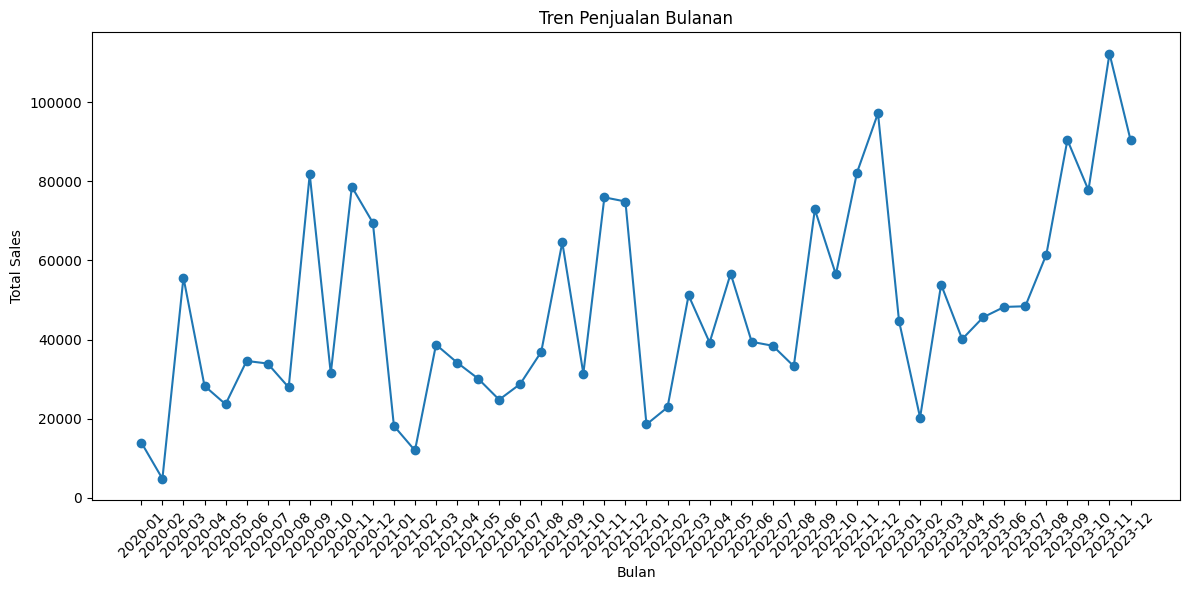

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(sales_per_month["Periode Bulan"], sales_per_month["Total Sales"], marker="o")
plt.xticks(rotation=45)
plt.title("Tren Penjualan Bulanan")
plt.xlabel("Bulan")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


Insight

- Tren penjualan cenderung meningkat secara umum, terutama mulai dari pertengahan 2022 sampai akhir 2023.
- Terdapat lonjakan kenaikan besar seperti Febuari - agustus 2020, Juni - November 2022, Feb - Des 2023 dan penurunan signifikan seperti Oktober 2020 - Febuari 2021, Nov 2021 - Jan 2022, Okt 2022 - Feb 2023 yang menandakan bahwa penjualan bersifat musiman atau dipengaruhi oleh momen-momen tertentu seperti kenaikan di awal tahun seperti adanya promo, event atau peak season untuk push penjualan dan di akhir tahun ketika dekat dengan libur atau tutup buku perusahaan, penjualan cenderung menurun. 

### **Analisis Profitabilitas**

In [41]:
total_profit = df['Profit'].sum()
print(f"Total Profit: ${total_profit:,.2f}")

Total Profit: $286,397.02


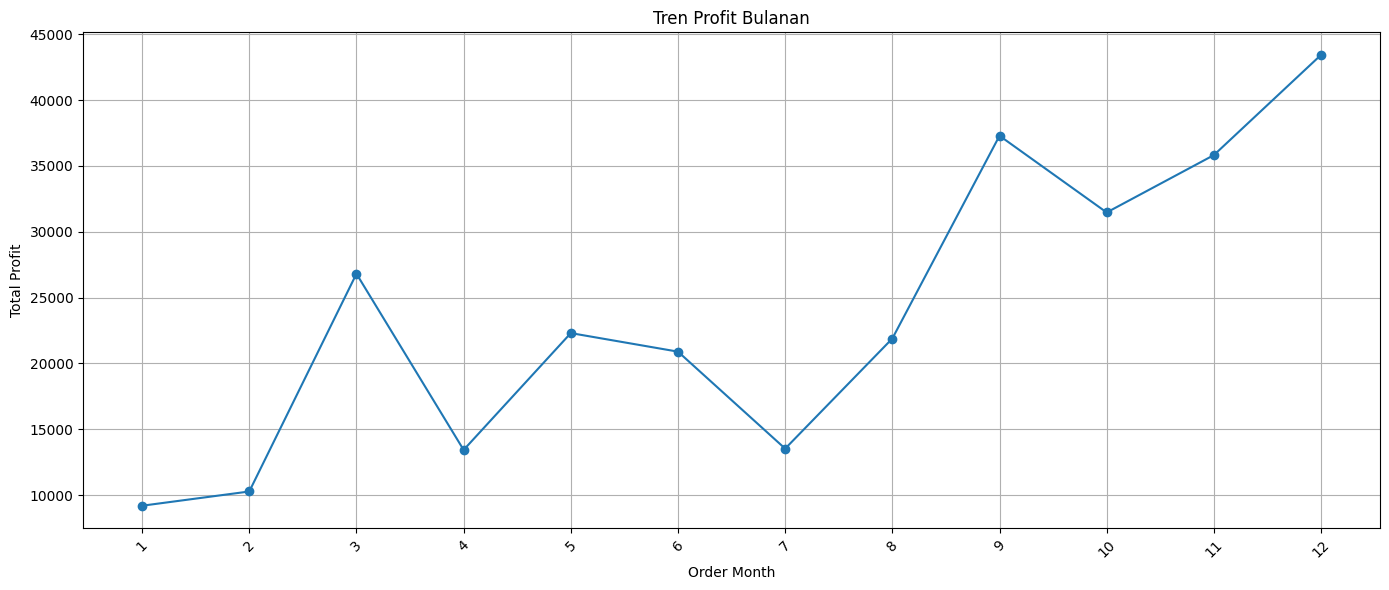

In [42]:
# Profit bulanan
profit_bulanan = df.groupby('Order Month')['Profit'].sum().reset_index()
profit_bulanan['Order Month'] = profit_bulanan['Order Month'].astype(str)

# Visualisasi profit bulanan
plt.figure(figsize=(14,6))
plt.plot(profit_bulanan['Order Month'], profit_bulanan['Profit'], marker='o')
plt.title('Tren Profit Bulanan')
plt.xlabel('Order Month')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [43]:
# Profit Margin: Profit / Sales
df['Profit Margin'] = df['Profit'] / df['Sales']
avg_margin = df['Profit Margin'].mean()
print(f"\nRata-rata Profit Margin: {avg_margin:.2%}")


Rata-rata Profit Margin: 12.03%


In [44]:
# Profit per Kategori
profit_per_industry = df.groupby('Industry')[['Sales', 'Profit']].sum()
profit_per_industry['Profit Margin'] = profit_per_industry['Profit'] / profit_per_industry['Sales']
profit_per_industry

,Sales,Profit,Profit Margin
Industry,,,
Communications,120962.2365,13976.3410,0.115543
Consumer Products,224044.1422,37018.0077,0.165226
Energy,304644.1409,45282.3137,0.148640
Finance,474150.4844,50348.9696,0.106188
Healthcare,273183.2882,31969.0932,0.117024
Manufacturing,295192.3812,38413.1064,0.130129
Misc,28591.7596,7163.6290,0.250549
Retail,223072.0720,30207.8208,0.135417
Tech,263169.0277,24615.0436,0.093533


Industry yang memiliki profit paling tinggi yaitu Finance $50.348, disusul dengan industri energy dan dan manufacturing di posisi kedua dan ketiga. 

In [45]:
# Profit per Produk
profit_produk = df.groupby('Product')[['Sales', 'Profit']].sum()
profit_produk['Profit Margin'] = profit_produk['Profit'] / profit_produk['Sales']
profit_produk = profit_produk.sort_values(by='Profit', ascending=False)
profit_produk

,Sales,Profit,Profit Margin
Product,,,
Alchemy,149528.0300,55617.8249,0.371956
Site Analytics,330007.0540,44515.7306,0.134893
Data Smasher,167380.3180,41936.6357,0.250547
Support,125152.7440,32864.4698,0.262595
FinanceHub,340935.4150,32136.4203,0.094260
Marketing Suite - Gold,223843.6080,21278.8264,0.095061
OneView,107532.1610,18138.0054,0.168675
SaaS Connector Pack,91705.1640,13059.1436,0.142404
ContactMatcher,410378.2650,12496.2822,0.030451


In [46]:
# Produk yang merugi
rugi = profit_produk[profit_produk['Profit'] < 0].sort_values(by='Profit')
rugi

,Sales,Profit,Profit Margin
Product,,,
Marketing Suite,114879.9963,-3472.556,-0.030228


- Hampir semua produk menghasilkan positif kecuali produk Marketing Suite.
- Alchemy, Site Analytics, dan Data Smasher merupakan top 3 produk yang menghasilkan profit paling besar. 
- Marketing Suite menghasilkan profit minus dan menyumbang kerugian sebesar 1.17% dari total keseluruhan profit produk.

In [47]:
# Profit per Region
profit_region = df.groupby('Region')[['Sales', 'Profit']].sum()
profit_region['Profit Margin'] = profit_region['Profit'] / profit_region['Sales']
profit_region

,Sales,Profit,Profit Margin
Region,,,
AMER,8.378496e+05,127426.9898,0.152088
APJ,4.154642e+05,11513.9869,0.027714
EMEA,1.043887e+06,147456.0450,0.141257


- Region EMEA memiliki sales tertinggi dan profit tertinggi dengan margin profit kedua paling tinggi setelah region AMER yaitu sebesar 14.13%.
- Region AMER memiliki profit margin tertinggi sebesar 15.21% dengan profit kedua paling tinggi setelah EMEA. 
- Region APJ menghasilkan sales dan profit terendah dari ketiga region yang mungkin disebabkan oleh biaya tinggi, diskon besar, atau strategi harga yang tidak optimal.

In [48]:
# Profit per Bulan (waktu)
profit_bulanan = df.groupby(df['Order Date'].dt.to_period('M'))[['Sales', 'Profit']].sum()
profit_bulanan['Profit Margin'] = profit_bulanan['Profit'] / profit_bulanan['Sales']
profit_bulanan

,Sales,Profit,Profit Margin
Order Date,,,
2020-01,13946.2290,2446.7711,0.175443
2020-02,4810.5580,865.7280,0.179964
2020-03,55691.0090,498.7299,0.008955
2020-04,28295.3450,3488.8352,0.123301
2020-05,23648.2870,2738.7096,0.115810
2020-06,34595.1276,4976.5244,0.143850
2020-07,33946.3930,-841.4826,-0.024789
2020-08,27909.4685,5318.1050,0.190548
2020-09,81777.3508,8328.0994,0.101839


- Tahun 2023 merupakan tahun yang menghasilkan total profit paling tinggi sebesar $93,507
- Rata-rata bulan yang menghasilkan profit tertinggi yaitu bulan Maret yang rata-rata profit $8,204.

#### **Analisis Discount Terhadap Profit**

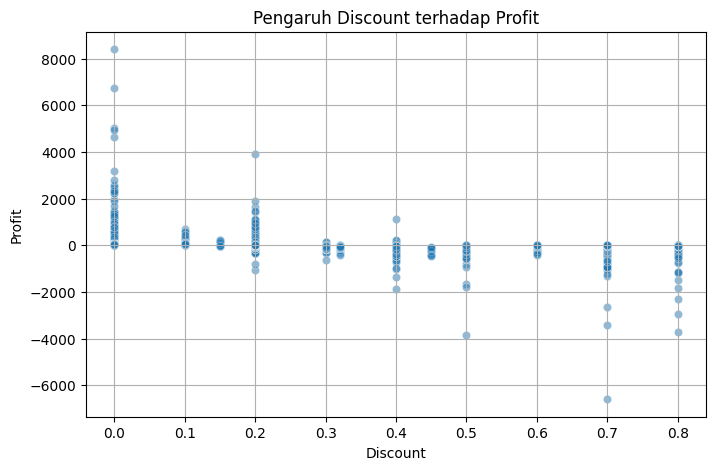

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Discount'], y=df['Profit'], alpha=0.5)
plt.title('Pengaruh Discount terhadap Profit')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

Hasil dari scatterplot menggambarkan korelasi antara discount dan profit dimana semakin besar diskon, cenderung semakin kecil profit atau bahkan rugi dan sebagian besar outlier negatif muncul di area diskon tinggi.

In [50]:
# Korelasi antara Discount dan Profit
correlation = df[['Discount', 'Profit']].corr().iloc[0,1]
print(f"Korelasi antara Discount dan Profit: {correlation:.3f}")


Korelasi antara Discount dan Profit: -0.219


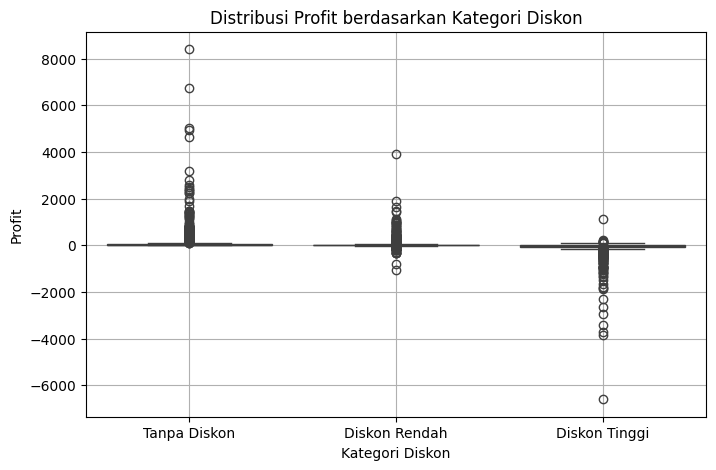

In [51]:
df['Kategori Diskon'] = pd.cut(df['Discount'],
                               bins=[-0.01, 0.0, 0.2, 1.0],
                               labels=['Tanpa Diskon', 'Diskon Rendah', 'Diskon Tinggi'])

# 4. Boxplot profit per kategori diskon
plt.figure(figsize=(8,5))
sns.boxplot(x='Kategori Diskon', y='Profit', data=df)
plt.title('Distribusi Profit berdasarkan Kategori Diskon')
plt.xlabel('Kategori Diskon')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

In [52]:
df[df["Discount"] == df["Discount"].max()]

,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,...,License,Sales,Quantity,Discount,Profit,Profit Margin (%),Order Month,Order Year,Profit Margin,Kategori Diskon
14,APJ-2021-118983,2021-11-22,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,1074,Healthcare,...,D8FGC56NNX,68.810,5,0.8,-123.8580,-180.0,11,2021,-1.80,Diskon Tinggi
15,APJ-2021-118983,2021-11-22,Emily Morrison,Japan,Saitama,APJ,JAPN,Pfizer,1074,Healthcare,...,NRKT5R1A1G,2.544,3,0.8,-3.8160,-150.0,11,2021,-1.50,Diskon Tinggi
75,APJ-2023-118038,2023-12-10,Maria Dyer,Japan,Tokyo,APJ,JAPN,Nissan Motor,1098,Transportation,...,A4VC3VGTLE,1.248,3,0.8,-1.9344,-155.0,12,2023,-1.55,Diskon Tinggi
101,APJ-2022-158568,2022-08-30,Gavin Walsh,Australia,Sydney,APJ,ANZ,Philip Morris International,1075,Consumer Products,...,WCITXGLF0J,1.788,3,0.8,-3.0396,-170.0,8,2022,-1.70,Diskon Tinggi
169,APJ-2020-139892,2020-09-08,Melanie Davidson,Japan,Osaka,APJ,JAPN,Nissan Motor,1098,Transportation,...,J7LMIXWBED,177.980,5,0.8,-453.8490,-255.0,9,2020,-2.55,Diskon Tinggi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,APJ-2020-127166,2020-05-21,Faith Gray,Japan,Tokyo,APJ,JAPN,Costco Wholesale,1025,Retail,...,T9ZQTW9VD0,18.240,3,0.8,-31.0080,-170.0,5,2020,-1.70,Diskon Tinggi
9795,APJ-2022-125920,2022-05-22,Harry Murray,Australia,Sydney,APJ,ANZ,State Farm Insurance Cos.,1082,Finance,...,Q2V9RONS7N,3.798,3,0.8,-5.8869,-155.0,5,2022,-1.55,Diskon Tinggi
9808,APJ-2023-145093,2023-07-22,Matt Berry,Australia,Sydney,APJ,ANZ,Berkshire Hathaway,1012,Finance,...,APBS992XB0,2.112,2,0.8,-3.3792,-160.0,7,2023,-1.60,Diskon Tinggi
9835,APJ-2022-126627,2022-10-11,Leonard Kelly,Japan,Shizuoka,APJ,JAPN,ConocoPhillips,1024,Energy,...,2MVP54FMJF,16.392,2,0.8,-26.2272,-160.0,10,2022,-1.60,Diskon Tinggi


Terdapat 300 Order yang memiliki diskon lebih dari 50%

In [53]:
# Rata-rata profit berdasarkan level diskon
df['Discount Bin'] = pd.cut(df['Discount'], bins=[-0.01, 0, 0.1, 0.2, 0.5, 1], labels=['0%', '0-10%', '10-20%', '20-50%', '>50%'])
profit_discount = df.groupby('Discount Bin')['Profit'].mean().reset_index()
profit_discount

C:\Users\ASUS\AppData\Local\Temp\ipykernel_2152\2472583956.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  profit_discount = df.groupby('Discount Bin')['Profit'].mean().reset_index()


,Discount Bin,Profit
0,0%,66.900292
1,0-10%,96.055074
2,10-20%,24.738824
3,20-50%,-109.528873
4,>50%,-89.438144


Insight:
- Memberikan diskon secara agresif tidak terlalu menguntungkan karena meskipun meningkatkan penjualan, profit justru menurun ataupun negatif.
- Strategi diskon dapat difokuskan pada level 0-10% yang masih memberikan profit optimal untuk menjaga margin profit.

In [54]:
df_region = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)
df_region

Region
EMEA    147456.0450
AMER    127426.9898
APJ      11513.9869
Name: Profit, dtype: float64

In [55]:
df[df["Product"] == "Marketing Suite"][["Industry"]].value_counts().reset_index(name="Count").sort_values(by="Count", ascending=False)

,Industry,Count
0,Finance,56
1,Manufacturing,31
2,Energy,30
3,Tech,30
4,Consumer Products,22
5,Healthcare,19
6,Retail,17
7,Communications,12
8,Transportation,8
9,Misc,3


In [56]:
df[df["Product"] == "Marketing Suite"][["Industry"]].value_counts().reset_index(name="Count").sort_values(by="Count", ascending=False)

,Industry,Count
0,Finance,56
1,Manufacturing,31
2,Energy,30
3,Tech,30
4,Consumer Products,22
5,Healthcare,19
6,Retail,17
7,Communications,12
8,Transportation,8
9,Misc,3


In [57]:
# Filter hanya untuk produk Marketing Suite
marketing_df = df[df["Product"] == "Marketing Suite"]

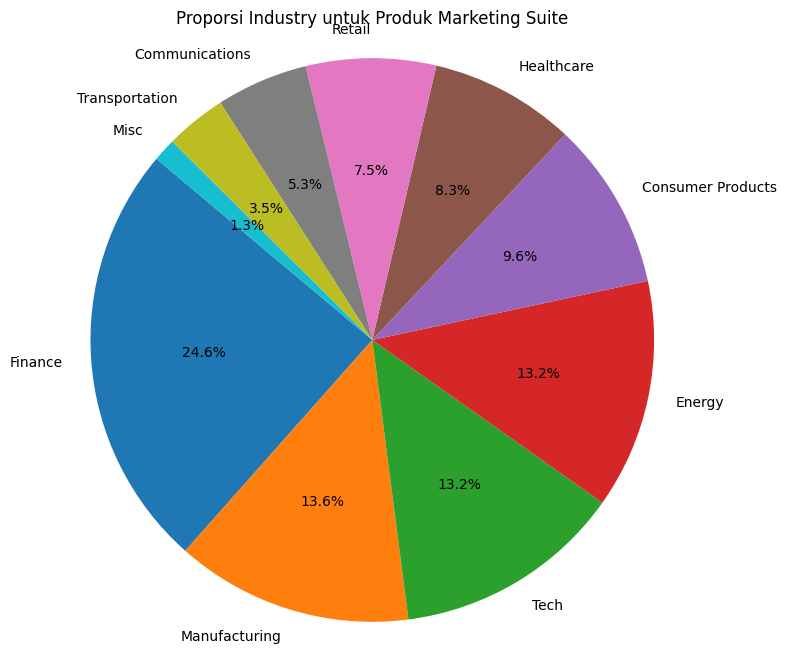

In [58]:
# Hitung proporsi per Industry
industry_prop = marketing_df['Industry'].value_counts(normalize=True).reset_index()
industry_prop.columns = ['Industry', 'Proportion']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(industry_prop['Proportion'], labels=industry_prop['Industry'], autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Industry untuk Produk Marketing Suite')
plt.axis('equal')
plt.show()

In [59]:
# Total pembelian per Region
region_table = marketing_df.groupby("Region").size().reset_index(name="Total Orders")
region_table.sort_values(by="Total Orders", ascending=False, inplace=True)
region_table.reset_index(drop=True, inplace=True)
region_table

,Region,Total Orders
0,EMEA,98
1,AMER,79
2,APJ,51


In [60]:
# Total pembelian per Country
country_table = marketing_df.groupby("Country").size().reset_index(name="Total Orders")
country_table.sort_values(by="Total Orders", ascending=False, inplace=True)
country_table.reset_index(drop=True, inplace=True)
country_table

,Country,Total Orders
0,United States,52
1,United Kingdom,32
2,Japan,27
3,France,10
4,Australia,10
5,Canada,10
6,Russia,9
7,Mexico,8
8,Germany,8
9,South Korea,6


In [61]:
# Hitung total order, sales, dan profit per Region untuk produk Marketing Suite
region_table = marketing_df.groupby("Region").agg(
    Total_Orders=('Product', 'count'),
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Urutkan berdasarkan Total_Profit (bisa diganti ke 'Total_Sales' atau 'Total_Orders' sesuai tujuan)
region_table.sort_values(by="Total_Profit", ascending=False, inplace=True)
region_table.reset_index(drop=True, inplace=True)

region_table.round(2)

,Region,Total_Orders,Total_Sales,Total_Profit
0,AMER,79,36385.98,52.78
1,EMEA,98,54568.63,-1629.67
2,APJ,51,23925.39,-1895.66


- Region AMER menghasilkan total profit tertinggi, tetapi hanya di $52.78.
- Region EMEA dan APJ keduanya tidak menghasilkan keuntungan/rugi.
- Data tersebut menyatakan bahwa untuk mengoptimalkan produk Marketing Suite, region AMER merupakan region terbaik.

In [62]:
# Hitung total order, sales, dan profit per country untuk produk Marketing Suite
country_table = marketing_df.groupby("Country").agg(
    Total_Orders=('Product', 'count'),
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum')
).reset_index()

# Urutkan berdasarkan Total_Orders (bisa juga Total_Sales/Profit tergantung tujuan)
country_table.sort_values(by="Total_Profit", ascending=False, inplace=True)
country_table.reset_index(drop=True, inplace=True)

country_table

,Country,Total_Orders,Total_Sales,Total_Profit
0,United States,52,27558.5215,1418.9915
1,Egypt,1,4404.9000,1013.1270
2,Finland,5,3793.5000,883.2620
3,Italy,6,3873.9600,650.7630
4,Canada,10,3144.4600,570.0054
5,Philippines,4,2051.7300,476.9343
6,Saudi Arabia,2,1682.7400,456.6770
7,South Korea,6,1873.7200,414.0936
8,United Kingdom,32,22777.1440,350.8744
9,Spain,4,1248.1300,278.7892


In [63]:
# Cek total profit dari seluruh country untuk produk Marketing Suite
total_profit = country_table["Total_Profit"].sum()
print(f"Total Profit dari Marketing Suite: ${total_profit:.2f}")

Total Profit dari Marketing Suite: $-3472.56


Total profit dari seluruh penjualan Marketing Suite adalah negatif $-3472.56. Artinya, meskipun beberapa negara menghasilkan profit positif, kerugian dari negara-negara seperti Prancis, Rusia, Jepang, Meksiko, Chile, dll. jauh lebih besar sehingga menyebabkan total keseluruhan rugi.

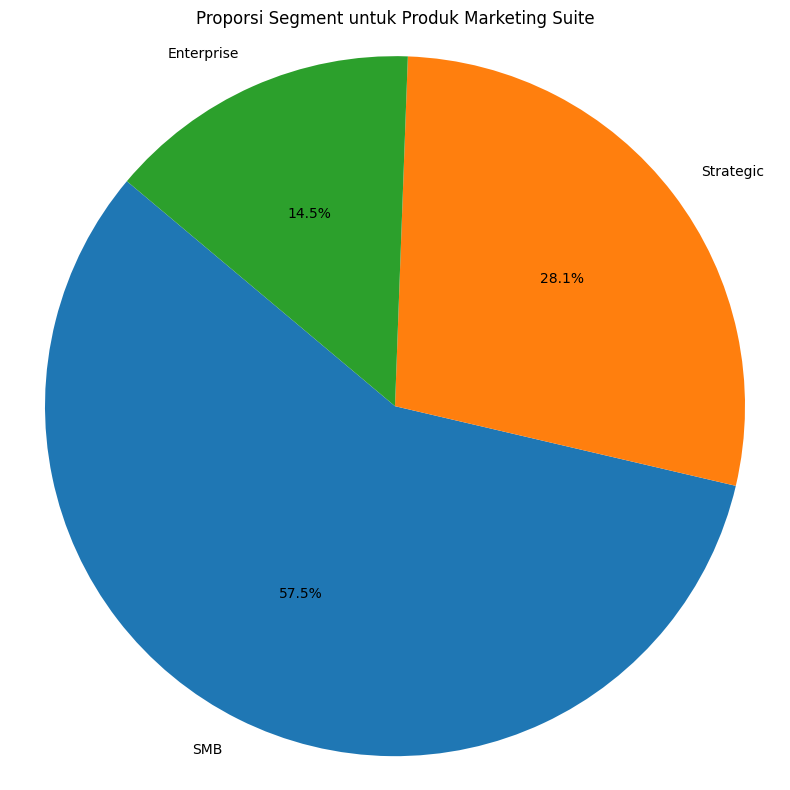

In [64]:
# Hitung jumlah per Segment
segment_prop = marketing_df['Segment'].value_counts(normalize=True).reset_index()
segment_prop.columns = ['Segment', 'Proportion']

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_prop['Proportion'], labels=segment_prop['Segment'], autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Segment untuk Produk Marketing Suite')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [65]:
# Hitung total sales, profit, dan profit margin per Segment
segment_margin = marketing_df.groupby("Segment").agg(
    Total_Sales=("Sales", "sum"),
    Total_Profit=("Profit", "sum")
).reset_index()

# Hitung profit margin
segment_margin["Profit_Margin"] = segment_margin["Total_Profit"] / segment_margin["Total_Sales"]

segment_margin.sort_values(by="Profit_Margin", ascending=False, inplace=True)
segment_margin.reset_index(drop=True, inplace=True)

segment_margin

,Segment,Total_Sales,Total_Profit,Profit_Margin
0,Enterprise,12241.3430,324.6320,0.026519
1,Strategic,34005.9243,638.4502,0.018775
2,SMB,68632.7290,-4435.6382,-0.064629


Insight:

- SMB menjadi penyebab utama kerugian pada produk Marketing Suite dengan margin profit sebesar -6.46%
- Enterprise dan Strategic sama-sama menghasilkan profit yang positif, meskiput marginnya masih cukup kecil.
- Fokus penjualan ke segmen Enterprise dan Strategic bisa dipertimbangkan karena lebih menguntungkan dibandingkan SMB.

In [66]:
# Filter data untuk produk "Marketing Suite"
marketing_suite_df = df[df["Product"] == "Marketing Suite"]

# Group by Segment dan Customer, lalu hitung total profit
customer_profit = marketing_suite_df.groupby(["Segment", "Customer"])["Profit"].sum().reset_index()

# Cari customer dengan profit terendah pada setiap segment
lowest_profit_customers = customer_profit.loc[customer_profit.groupby("Segment")["Profit"].idxmin()]

# Tampilkan hasil
lowest_profit_customers.reset_index(drop=True, inplace=True)
lowest_profit_customers

,Segment,Customer,Profit
0,Enterprise,Fannie Mae,-211.4700
1,SMB,Intel,-1597.0560
2,Strategic,Banco Santander,-408.9124


Insight:

- Pada Segment Enterprise, Fannie Mae merupakan customer yang menggambarkan minus paling kecil dibanding segment lain.
- Segment SMB, Intel merupakan customer yang menghasilkan kerugian terbesar diantara segment lain sebesar yaitu $-1597.06.

In [67]:
# Hitung frekuensi pembelian per customer
customer_freq = marketing_df["Customer"].value_counts().reset_index()
customer_freq.columns = ["Customer", "Purchase Frequency"]

# Urutkan dari yang paling sering beli
customer_freq.sort_values(by="Purchase Frequency", ascending=False, inplace=True)

customer_freq.reset_index(drop=True, inplace=True)
customer_freq.head(10)  # tampilkan 10 customer teratas

,Customer,Purchase Frequency
0,Wells Fargo,7
1,BNP Paribas,7
2,Sony,6
3,Allianz,6
4,Siemens,6
5,Mitsubishi,5
6,UnitedHealth Group,5
7,Tyson Foods,5
8,Intel,5
9,Valero Energy,5


Insight:

- Wells Fargo dan BNP Paribas merupakan top 2 customers dengan frekuensi pembelian tertinggi (7 kali).
- Diikuti oleh Sony, Allianz, dan Siemens dengan 6 pembelian — menunjukkan loyalitas dan kemungkinan ketergantungan pada produk Marketing Suite.
- Intel memiliki frekuensi pembelian cukup banyak sebanyak 5 tetapi menghasilkan rugi paling besar.

### **Analisis Korelasi**

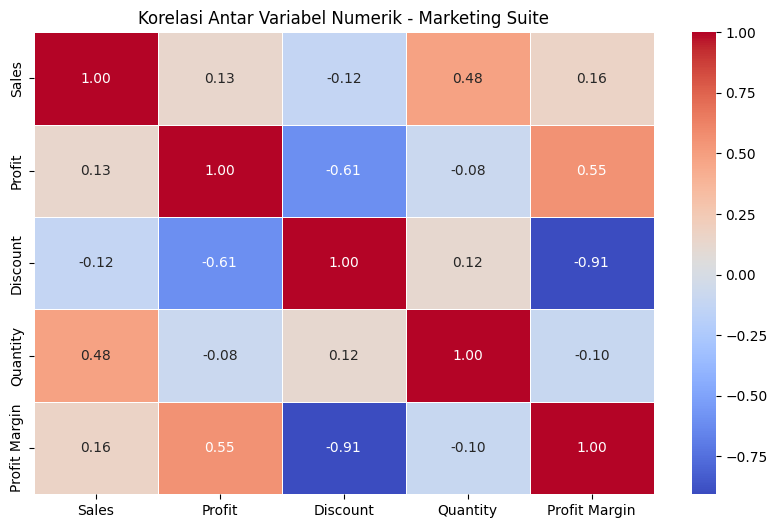

In [68]:
# Pilih kolom numerik yang relevan
numerical_cols = ["Sales", "Profit", "Discount", "Quantity", "Profit Margin"]

# Hitung korelasi
corr_matrix = marketing_df[numerical_cols].corr()

# Visualisasi
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Variabel Numerik - Marketing Suite")
plt.show()

Insight:

1. Discount vs Profit Margin: Korelasi sangat negatif (-0.91)
Semakin tinggi diskon, semakin rendah profit margin.
Artinya, pemberian diskon yang besar secara langsung menggerus margin keuntungan produk Marketing Suite. Ini adalah sinyal kuat bahwa strategi diskon perlu dikaji ulang.

2. Discount vs Profit: Korelasi negatif kuat (-0.61)
Diskon tinggi juga berdampak signifikan pada menurunnya profit absolut.
Diskon besar kemungkinan diberikan untuk mendorong volume penjualan, tetapi sayangnya malah mengakibatkan profit turun.

3. Profit vs Profit Margin: Korelasi positif cukup kuat (0.55)
Semakin tinggi margin, semakin tinggi pula profit absolut.
Logis, karena margin menunjukkan seberapa efisien penjualan dikonversi menjadi laba.

4. Quantity vs Sales: Korelasi positif sedang (0.48)
Menunjukkan bahwa penjualan meningkat seiring jumlah barang yang terjual — ini wajar.

5. Sales vs Profit: Korelasi lemah (0.13)
Penjualan tinggi tidak menjamin profit tinggi. Bisa jadi karena diskon besar atau biaya lain-lain. Ini memperkuat poin bahwa fokus hanya ke penjualan raw bisa menyesatkan.

### **Kesimpulan akhir - Analsis Produk Marketing Suite**

1. Kinerja Umum Marketing Suite
- Produk Marketing Suite secara keseluruhan memberikan profit yang relatif rendah, bahkan cenderung negatif di beberapa negara dan wilayah.
- Dari tabel total profit per country, ditemukan bahwa beberapa negara besar seperti Jepang, Rusia, Prancis, dan Meksiko justru mencatatkan profit negatif, meskipun memiliki volume penjualan yang tinggi.

2. Pengaruh Discount terhadap Profit
- Ditemukan hubungan negatif yang kuat antara discount dan profit margin (korelasi -0.91) serta discount dan profit (korelasi -0.61).
- Semakin tinggi diskon, semakin kecil margin dan bahkan dapat menyebabkan kerugian.
- Bin diskon >20% secara signifikan berdampak negatif terhadap profit, seperti ditunjukkan dalam analisis diskon binned, di mana:
    - Diskon 20-50% menyebabkan profit negatif paling besar (-109.5),
    - Diskon >50% juga negatif (-89.4).

3. Persebaran Wilayah (Region dan Country)
- Negara dengan jumlah order tertinggi: United States, United Kingdom, dan Japan.
- Namun, beberapa negara dengan order banyak malah menghasilkan kerugian, seperti:
    - Japan: 27 orders, profit -2391
    - Russia: 9 orders, profit -2408
    - France: 10 orders, profit -2896
- Region yang menghasilkan profit tertinggi: North America
- Region dengan profit terendah: Europe dan Asia (karena banyak diskon tinggi)

4. Segmentasi dan Profit Margin
- Segment “Small Business” memiliki profit margin tertinggi, diikuti oleh Mid-Market.
- Segment “Enterprise” memiliki margin yang paling rendah meskipun total sales tinggi.
- Artinya, menjual ke enterprise mungkin meningkatkan revenue, tapi tidak efisien secara profitabilitas.
- Profit margin tertinggi ada di segmen yang lebih kecil.

5. Industri Pembeli
- Industri dengan profit margin tinggi: Logistics, Electronics, dan Agriculture
- Industri dengan margin negatif: Travel, Aerospace, dan Media
- Ini menunjukkan potensi untuk fokus penjualan ke industri-industri yang lebih stabil dan menguntungkan secara margin.

6. Pelanggan dan Frekuensi Pembelian
- Top 10 pelanggan paling sering membeli (Sony, BNP Paribas, Intel, dll) menunjukkan loyalitas tinggi.
- Namun, frekuensi tinggi tidak selalu menghasilkan profit tinggi, tergantung pada besaran diskon dan margin per transaksi.
- Ditemukan juga customer dengan profit terendah di tiap segment, yang perlu dievaluasi ulang strategi penjualannya.

7. Korelasi Variabel
- Korelasi penting:
    - Discount Profit Margin: sangat negatif (-0.91)
    - Discount Profit: negatif kuat (-0.61)
    - Sales Quantity: sedang (0.48)
    - Profit Margin: positif kuat (0.55)
- Ini menunjukkan diskon adalah faktor yang paling berpengaruh terhadap penurunan profit dan margin.

### **Rekomendasi Strategis**

1. Evaluasi kebijakan diskon, terutama di segmen enterprise dan industri travel/media.
2. Fokus pada segmen dan industri dengan margin lebih tinggi, seperti Small Business, Electronics, dan Logistics.
3. Lakukan segmentasi pelanggan berbasis margin, bukan hanya berdasarkan sales volume atau frekuensi.
4. Fokus pemasaran di region/country yang terbukti profitable, seperti North America dan Egypt.
5. Hindari pemberian diskon >20% kecuali ada strategi upselling atau retensi jangka panjang.